<h1> Mercari Price Suggestion Challenge </h1>

## 1. Business Problem 

### 1.1 Description

*	Mercari is a Japanese e-commerce company. Their main product is marketplace app which enables people to easily sell and purchase second-hand items with smartphones.
* The company has over 19 million monthly active users on its platform, the company wants to help the sellers by suggesting the right pricing of the items.
* Suggesting the pricing to its sellers is tough job because the sellers can sell anything, or any bundle of things on Mercari’s marketplace.
*	Mercari wants us to build an algorithm that automatically suggests the right product prices from the user-inputted text descriptions of their products, including details like product category name, brand name, item condition, etc.


### 1.2 Source Link

> source: https://www.kaggle.com/c/mercari-price-suggestion-challenge 

### 1.3	Real world/Business Objectives and Constraints:
* 	The goal is to solve the problem of suggesting the appropriate price of products to online sellers. 
* 	Some Latency constraints. It Should finish in few seconds.
* 	Incorrect suggesting of price could impact customer’s experience.


In [ ]:
'''

##Mercari Price Suggestion Challenge
####Can you automatically suggest product prices to online sellers?


Problem Statement: Predict the sale price of a listing based on information a user provides for this listing.
'''

##Exploratory Data Analysis 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!gdown --id 1i_xu5xZwPSvbO6n3xdWFdOnYDis5paCe

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1i_xu5xZwPSvbO6n3xdWFdOnYDis5paCe
To: /content/test_stg2.tsv.zip
100% 309M/309M [00:02<00:00, 136MB/s]


In [ ]:
!unzip '/content/test_stg2.tsv.zip'

Archive:  /content/test_stg2.tsv.zip
  inflating: test_stg2.tsv           


In [14]:
!gdown --id 13pcSpXZIAVm7qGTtxwULheecppLDUcS2

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=13pcSpXZIAVm7qGTtxwULheecppLDUcS2
To: /content/final_test_stg2_pp.zip
100% 771M/771M [00:13<00:00, 58.2MB/s]


In [16]:
!unzip '/content/final_test_stg2_pp.zip'

Archive:  /content/final_test_stg2_pp.zip
  inflating: final_test_stg2_pp.pkl  


In [ ]:
!7z e '/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train.tsv.7z'


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/                                                                   1 file, 77912192 bytes (75 MiB)

Extracting archive: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train.tsv.7z
--
Path = /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train.tsv.7z
Type = 7z
Physical Size = 77912192
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      1%      4% - train.tsv                  8% - train.tsv                 11% - train.tsv            

In [3]:
# importing library
import numpy as np
import pandas as pd


import pandas as pd
import matplotlib.pyplot as plt

import pickle
#import cPickle


import regex as re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
!pip install Wordbatch
from wordbatch.models import FTRL, FM_FTRL
!pip install kmodes
from kmodes.kmodes import KModes

from sklearn.linear_model import Ridge

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 5.2 MB/s 
     |████████████████████████████████| 50 kB 7.5 MB/s 
     |████████████████████████████████| 128 kB 64.3 MB/s 
     |████████████████████████████████| 3.5 MB 58.6 MB/s 
  Created wheel for Wordbatch: filename=Wordbatch-1.4.9-cp37-cp37m-linux_x86_64.whl size=2768573 sha256=cf3ecee02af06977262fdc2090fbedabab3ec18f3ab1ce2ffa2a742dc98f80e0
  Stored in directory: /root/.cache/pip/wheels/7c/c6/17/9c8d8c8e37a08ea8a9a3d7e75aaa642ae0e1d2f4079ce11d93
  Created wheel for py-lz4framed: filename=py_lz4framed-0.14.0-cp37-cp37m-linux_x86_64.whl size=346635 sha256=ac6f09147d06d8edef5c3de41813d4065903c20d6474729b9789efaa9dcfc855
  Stored in directory: /root/.cache/pip/wheels/5c/9c/8e/5d008dfcbb83cfb99763f100d10b6b2d953274f48744b7be81
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149863

In [4]:
from scipy.sparse import load_npz
from scipy.sparse import hstack
from lightgbm import LGBMRegressor

from sklearn.model_selection import RandomizedSearchCV

from scipy.sparse import load_npz

In [ ]:
# Python code to convert .tsv file to .csv file

tsv_file='/content/train.tsv'
  
# reading tsv file
data=pd.read_table(tsv_file,sep='\t')
  
# converting tsv into csv
data.to_csv('GfG.csv',index=False)


In [ ]:
data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [21]:
# Python code to convert .tsv file to .csv file

tsv_file='/content/test_stg2.tsv'
  
# reading tsv file
test_stg_2=pd.read_table(tsv_file,sep='\t')
  

In [ ]:
print('Total number of row and columns in dataset:',data.shape)

Total number of row and columns in dataset: (1482535, 8)


In [ ]:
data.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')

In [ ]:
test_stg_2.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


In [ ]:
test_stg_2.shape

(3460725, 7)

### Data fields:

* train_id : the id of the listing. 

* name - the title of the listing. 

* item_condition_id - the condition of the items provided by the seller

* category_name - category of the listing

* brand_name - brand name of the item

* price - the price that the item was sold for. 

* shipping - 1 if shipping fee is paid by seller and 0 by buyer

* item_description - the full description of the item.



In [ ]:
null_value_count=np.sum(data.isnull(),axis=0)  # this line get us the null value count in each field

from prettytable import PrettyTable
  
columns = ["columns", "Null value count", "% of Null value count"]
  
myTable = PrettyTable()
  
# Add Columns
myTable.add_column(columns[0],data.columns)
myTable.add_column(columns[1],null_value_count)
myTable.add_column(columns[2], list(map(lambda x: round(x/data.shape[0]*100,4),null_value_count)))
  
print(myTable)

+-------------------+------------------+-----------------------+
|      columns      | Null value count | % of Null value count |
+-------------------+------------------+-----------------------+
|      train_id     |        0         |          0.0          |
|        name       |        0         |          0.0          |
| item_condition_id |        0         |          0.0          |
|   category_name   |       6327       |         0.4268        |
|     brand_name    |      632682      |        42.6757        |
|       price       |        0         |          0.0          |
|      shipping     |        0         |          0.0          |
|  item_description |        4         |         0.0003        |
+-------------------+------------------+-----------------------+


Observation:

* 42.6% of brand name data is missing.This is a significant number.
* 0.42% of category_name field data is missing.
* 0.0003% of data doesn't contain item_description.


## Uni-varient analysis of price(target value):

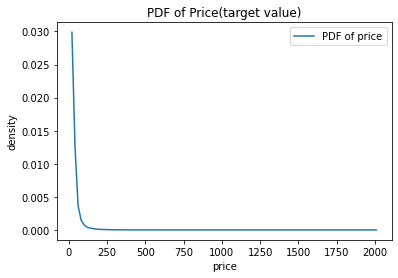

In [ ]:


histogram, bins = np.histogram(data['price'].values, bins=100, density=True)
#density = True, the result is the value of the probability density function at the bin

bin_centers = bins[1:]

plt.plot(bin_centers, histogram, label="PDF of price")
plt.xlabel('price')
plt.ylabel('density')
plt.title('PDF of Price(target value)')
plt.legend()
plt.show()

Obervation:

* From the above graph it was observed that most of the pricing of items that are sold in mercari's app value lie between 0 to 200.
* Their are only few item whose pricing from 200 to 2000.
* The target value have right skewed distribution. (has a long right tail).


In [ ]:

arr = data['price'].values

print("25th percentile of price : ",np.percentile(arr, 25))
print("50th percentile of price : ",np.percentile(arr, 50))
print("75th percentile of price : ",np.percentile(arr, 75))
print("100th percentile of price : ",np.percentile(arr, 100))

25th percentile of price :  10.0
50th percentile of price :  17.0
75th percentile of price :  29.0
100th percentile of price :  2009.0


In [ ]:
for i in range(90,101):
  print("{} th percentile of price : {}".format(i,np.percentile(arr,i)))

90 th percentile of price : 51.0
91 th percentile of price : 55.0
92 th percentile of price : 58.0
93 th percentile of price : 62.0
94 th percentile of price : 67.0
95 th percentile of price : 75.0
96 th percentile of price : 85.0
97 th percentile of price : 99.0
98 th percentile of price : 122.0
99 th percentile of price : 170.0
100 th percentile of price : 2009.0


In [ ]:
for i in range(1,11):
  j=99+(0.1)*i
  print("{} th percentile of price : {}".format(j,np.percentile(arr,j)))

99.1 th percentile of price : 180.0
99.2 th percentile of price : 189.0
99.3 th percentile of price : 200.0
99.4 th percentile of price : 210.0
99.5 th percentile of price : 230.3300000000745
99.6 th percentile of price : 256.0
99.7 th percentile of price : 286.0
99.8 th percentile of price : 340.0
99.9 th percentile of price : 450.0
100.0 th percentile of price : 2009.0


### Notes:

* If tail is on the right, it is right skewed data. It is also called positive skewed data.

What is problem with skewed distribution data?
* In skewed data, the tail region may act as an outlier for the statistical model and we know that outliers adversely affect the model’s performance especially regression-based models. 
* So there is a necessity to transform the skewed data to close enough to a Gaussian distribution or Normal distribution.

Reference:-https://towardsdatascience.com/skewed-data-a-problem-to-your-statistical-model-9a6b5bb74e37



Solution:
* To convert right skewed data to noraml distribution common transformations which are applied on data include square root, cube root, and log.

Reference:-https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55

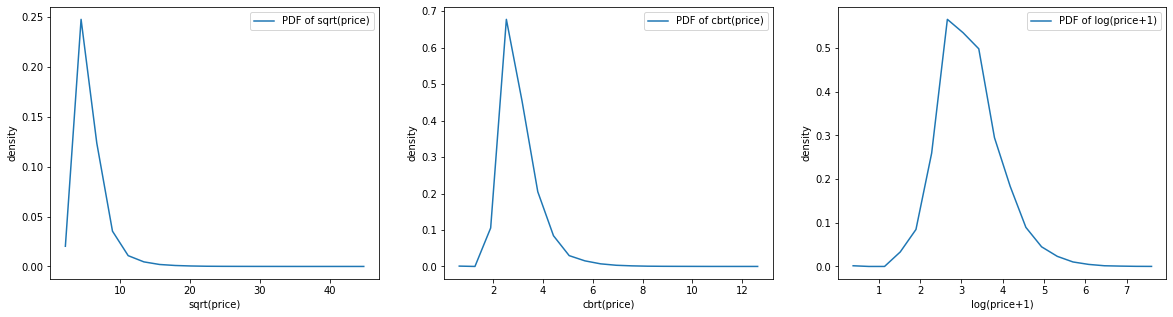

In [ ]:
plt.figure(figsize=(20, 5))

histogram, bins = np.histogram(np.sqrt(data['price'].values), bins=20, density=True)
bin_centers = bins[1:]
plt.subplot(1, 3, 1)
plt.plot(bin_centers, histogram, label="PDF of sqrt(price)")
plt.xlabel('sqrt(price)')
plt.ylabel('density')
plt.legend()

histogram, bins = np.histogram(np.cbrt(data['price'].values), bins=20, density=True)
bin_centers = bins[1:]
plt.subplot(1, 3, 2)
plt.plot(bin_centers, histogram, label="PDF of cbrt(price)")
plt.xlabel('cbrt(price)')
plt.ylabel('density')
plt.legend()

histogram, bins = np.histogram(np.log(data['price'].values+1), bins=20, density=True)
bin_centers = bins[1:]
plt.subplot(1, 3, 3)
plt.plot(bin_centers, histogram, label="PDF of log(price+1)")
plt.xlabel('log(price+1)')
plt.ylabel('density')


plt.legend()
plt.show()

### Observation:
* From the above three plots ,the third plot (log(price+1)) is less skewed compared to other two plots.
* In third plot we are adding 1, to avoid the problem of log(0) which is undefined.


## Loss function:

* From the above observations we can use Mean squared logarithmic error (MSLE) (OR) Root Mean Squared Logaritmic Error (RMSLE) as the loss function for the given dataset.

* MSLE and RMSE loss functions are the same, only differ by square root.

* Properties of MSLE:

  * > MSLE will treat small differences between small true and predicted values approximately the same as big differences between large true and predicted values.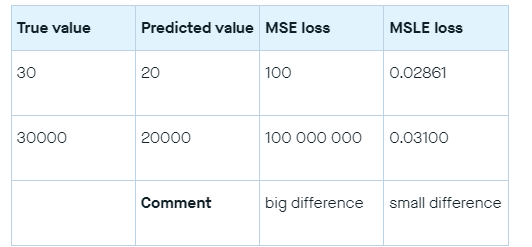

  * > MSLE also penalizes underestimates more than overestimates, introducing an asymmetry in the error curve. 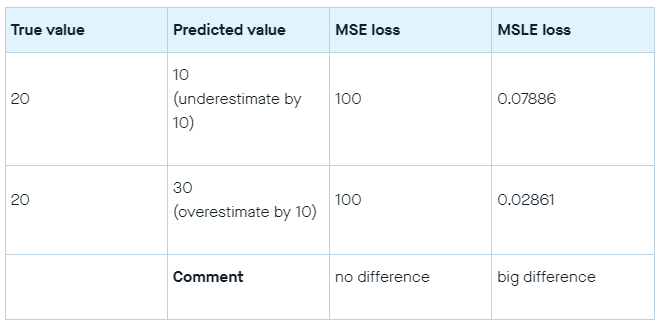
  
  * Reference:-https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/mean-squared-logarithmic-error-(msle)

* We choose RMSLE as our loss function because it do have same properties as MSLE and added plus point is square root which is used to remove the effects of the squaring.

* Since our target value (price) have large range from 0 to 2000, it was observed that there are fewer point that lie in higher range, if the predicated value and actual value differ a lot then RMSLE doesn't penalise much.This is added advantage because those few points may be outliers, this doesn't affect the model drastically.


<b>RMSE Formula: </b>

RMSLE= $\sqrt{\frac{1}{n}\sum_{i=1}^n (log(p_i+1)-log(y_i+1))^2}$

where,

   > $p_i$ is the preidicted value

   > $y_i$ is the actual value

   > $n$ is total number of observation

## Analysis of shipping:

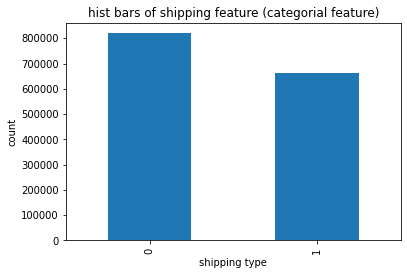

shipping 0 :55.27 %
shipping 1 :44.73 %


In [ ]:
# 1 if shipping fee is paid by seller and 0 by buyer
data['shipping'].value_counts().plot(kind='bar')
plt.title('hist bars of shipping feature (categorial feature)')
plt.xlabel('shipping type')
plt.ylabel('count')
plt.show()
x=data['shipping'].value_counts()
print('shipping 0 :'+str(round(x[0]/sum(x)*100,2))+' %')
print('shipping 1 :'+str(round(x[1]/sum(x)*100,2))+' %')

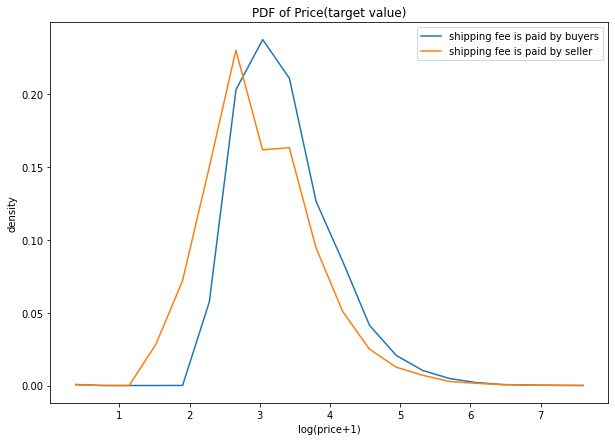

In [ ]:
data['log_price']=np.log(data['price']+1)
shipping_0_price=data[data['shipping']==0]['log_price'].values
shipping_1_price=data[data['shipping']==1]['log_price'].values

plt.figure(figsize=(10, 7))
histogram, bins = np.histogram(shipping_0_price, bins=20, density=True)
#density = True, the result is the value of the probability density function at the bin
bin_centers = bins[1:]
pdf = histogram / sum(histogram)
plt.plot(bin_centers, pdf, label="shipping fee is paid by buyers")

histogram, bins = np.histogram(shipping_1_price, bins=20, density=True)
bin_centers = bins[1:]
pdf = histogram / sum(histogram)
plt.plot(bin_centers, pdf, label="shipping fee is paid by seller")

plt.xlabel('log(price+1)')
plt.ylabel('density')
plt.title('PDF of Price(target value)')
plt.legend()
plt.show()

### Observation:

* PDF of log_price when shipping=1 is slightly left centred when compared with PDF of log_price when shipping=0   

* From the above plot it is observed that most of the time shipping cost is paid by sellers when pricing of the item is low.

* Another takeaway from above plot is when price is high most of the times Shipping cost is paid by buyers.

## Analysis of Item condition feature:

In [ ]:
item_cond=data['item_condition_id'].value_counts().to_frame()

item_cond['percentage_of_item_condition']=list(map(lambda x: round(x/data.shape[0]*100,2),item_cond['item_condition_id'].values))
item_cond=item_cond.reset_index()
item_cond.rename(columns={'index': 'item_cond_id', 'item_condition_id': 'cnt'}, inplace=True)
item_cond

,item_cond_id,cnt,percentage_of_item_condition
0,1,640549,43.21
1,3,432161,29.15
2,2,375479,25.33
3,4,31962,2.16
4,5,2384,0.16


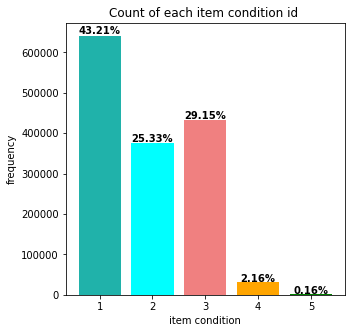

In [ ]:
#reference: https://www.geeksforgeeks.org/display-percentage-above-bar-chart-in-matplotlib/


plt.figure(figsize=(5, 5))

colors_list = ['#20B2AA','#F08080', '#00FFFF', 'Orange','Green']

graph = plt.bar(item_cond.item_cond_id,item_cond.cnt, color = colors_list)
plt.title('Count of each item condition id ')
plt.xlabel('item condition')
plt.ylabel('frequency')

i = 0
for p in graph:
	width = p.get_width()
	height = p.get_height()
	x, y = p.get_xy()
	plt.text(x+width/2,
			y+height*1.01,
			str(item_cond.percentage_of_item_condition[i])+'%',
			ha='center',
			weight='bold')
	i+=1
plt.show()


### Observation:

* 43.2% of the item have been rated as 1.
* There are fewer item with item condition as 4 and 5.

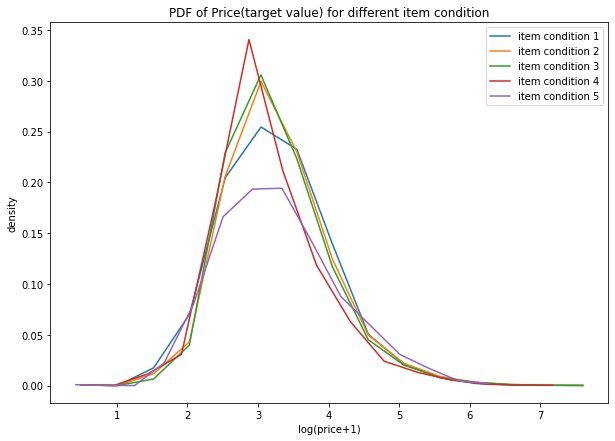

In [ ]:
plt.figure(figsize=(10, 7))

for i in [1,2,3,4,5]:
  histogram, bins = np.histogram(data[data['item_condition_id']==i]['log_price'], bins=15, density=True)
  #density = True, the result is the value of the probability density function at the bin
  bin_centers = bins[1:]
  pdf = histogram / sum(histogram)
  plt.plot(bin_centers, pdf, label='item condition '+str(i))

plt.xlabel('log(price+1)')
plt.ylabel('density')
plt.title('PDF of Price(target value) for different item condition')
plt.legend()
plt.show()

##Obervation:

* PDF of log(price+1) for different the item condition is ploted above.
*These PDF's are overlapping, no conclusion can be drawn from this plot.

## Analysis of Brand name feature:

In [ ]:
print('Total number of unique Brands :',len(data['brand_name'].unique()))  # including NAN 

Total number of unique Brands : 4810


In [ ]:
count_of_NAN=sum(data['brand_name'].isnull().values)
print('Total number of missing values in brand field',count_of_NAN)
print('\nPercentage of missing values :',round((count_of_NAN/data.shape[0])*100,2))

Total number of missing values in brand field 632682

Percentage of missing values : 42.68


In [ ]:
# filling the missing values with "not known"

data['brand_name'].fillna(value='not known', inplace=True)

In [ ]:
data['brand_name']=data['brand_name'].str.lower()
brand_df=data['brand_name'].value_counts().to_frame().reset_index()
brand_df.rename(columns={'index': 'Brand', 'brand_name': 'cnt'}, inplace=True)
brand_df['percentage_of_brand']=list(map(lambda x:round(x/data.shape[0]*100,2),brand_df['cnt'].values))
brand_df.head(10)

,Brand,cnt,percentage_of_brand
0,not known,632682,42.68
1,pink,54088,3.65
2,nike,54043,3.65
3,victoria's secret,48036,3.24
4,lularoe,31024,2.09
5,apple,17322,1.17
6,forever 21,15186,1.02
7,nintendo,15007,1.01
8,lululemon,14558,0.98
9,michael kors,13928,0.94


Text(0, 0.5, 'frequency')

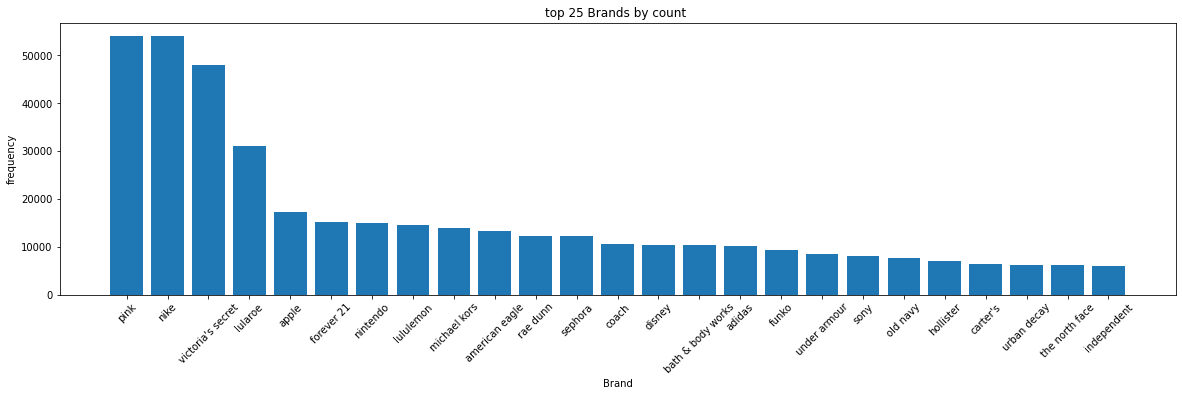

In [ ]:
plt.figure(figsize=(20, 5))

plt.bar(brand_df.Brand[1:26],brand_df.cnt[1:26]) # ignoring "not known" values
plt.title('top 25 Brands by count ')
plt.xticks(rotation=45)
plt.xlabel('Brand')
plt.ylabel('frequency')

## Observation:

* Top 3 Brands by count are pink,nike and victoria's secret.These 3 Brands cover 10% of over dataset.

* Their are few elctronic brand in top 25 by count like apple, sony.

In [ ]:
brand_df=brand_df.merge(data[['brand_name','price']].groupby(by='brand_name').mean(), how='inner', left_on='Brand',right_on='brand_name')
brand_df.rename(columns={'price': 'mean_price'}, inplace=True)
brand_df=brand_df.merge(data[['brand_name','price']].groupby(by='brand_name').median(), how='inner', left_on='Brand',right_on='brand_name')
brand_df.rename(columns={'price': 'median_price'}, inplace=True)
brand_df.head(10)

,Brand,cnt,percentage_of_brand,mean_price,median_price
0,not known,632682,42.68,21.133453,14.0
1,pink,54088,3.65,26.341314,20.0
2,nike,54043,3.65,30.760265,22.0
3,victoria's secret,48036,3.24,23.214287,19.0
4,lularoe,31024,2.09,33.667967,29.0
5,apple,17322,1.17,73.268618,22.0
6,forever 21,15186,1.02,12.929935,12.0
7,nintendo,15007,1.01,34.672619,20.0
8,lululemon,14558,0.98,47.096717,39.0
9,michael kors,13928,0.94,62.254775,49.0


In [ ]:
brand_df=brand_df.merge(data[['brand_name','price']].groupby(by='brand_name').max(), how='inner', left_on='Brand',right_on='brand_name')
brand_df.rename(columns={'price': 'max_price'}, inplace=True)
brand_df=brand_df.merge(data[['brand_name','price']].groupby(by='brand_name').min(), how='inner', left_on='Brand',right_on='brand_name')
brand_df.rename(columns={'price': 'min_price'}, inplace=True)
brand_df.head(20)

,Brand,cnt,percentage_of_brand,mean_price,median_price,max_price,min_price
0,not known,632682,42.68,21.133453,14.0,2000.0,0.0
1,pink,54088,3.65,26.341314,20.0,798.0,0.0
2,nike,54043,3.65,30.760265,22.0,459.0,0.0
3,victoria's secret,48036,3.24,23.214287,19.0,1400.0,0.0
4,lularoe,31024,2.09,33.667967,29.0,350.0,0.0
5,apple,17322,1.17,73.268618,22.0,1909.0,0.0
6,forever 21,15186,1.02,12.929935,12.0,180.0,0.0
7,nintendo,15007,1.01,34.672619,20.0,600.0,0.0
8,lululemon,14558,0.98,47.096717,39.0,711.0,0.0
9,michael kors,13928,0.94,62.254775,49.0,1770.0,0.0


## Observation:

* From the above table it was observed that there are items in the brands(top 20) which are priced as zero.
* Their are brands whose item pricing fall in large range like victoria's secret, apple, michael kors.

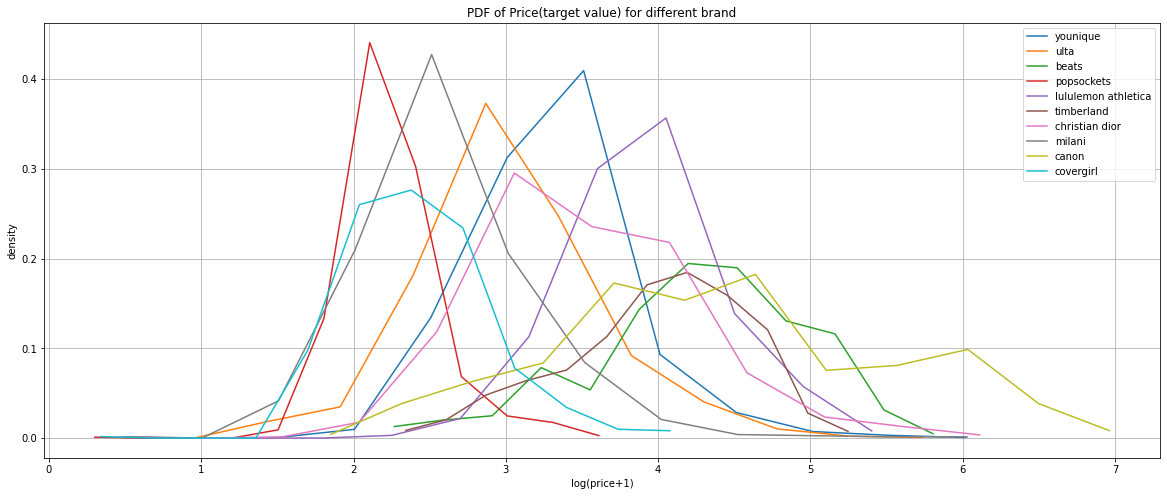

In [ ]:
plt.figure(figsize=(20, 8))

gf=data[['brand_name','price','log_price']].groupby(by='brand_name',sort=False)

lt_brand=brand_df['Brand'][100:200:10].values #some random brand name

tmp_brand=[]
tmp_brand_price=[]
for i in lt_brand:
  temp=gf.get_group(i)
  #display(i)
  #print(type(temp))
  lg_price=temp['log_price'].values
  histogram, bins = np.histogram(lg_price, bins=12, density=True)
  #density = True, the result is the value of the probability density function at the bin
  bin_centers = bins[1:]
  pdf = histogram / sum(histogram)
  
  plt.plot(bin_centers, pdf, label=i)
  tmp_brand.append(i)
  tmp_brand_price.append(lg_price)
  




plt.xlabel('log(price+1)')
plt.ylabel('density')
plt.title('PDF of Price(target value) for different brand')
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


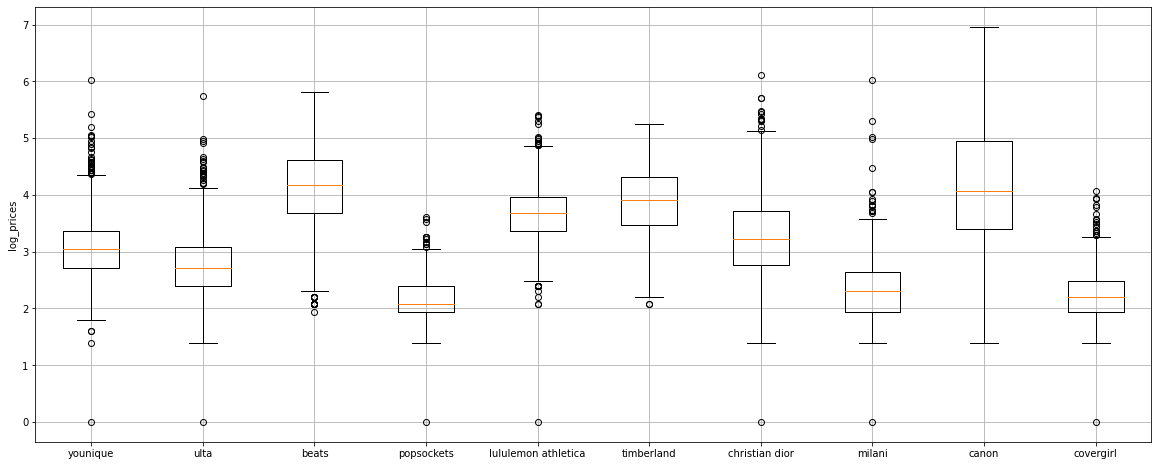

In [ ]:
plt.figure(figsize=(20, 8))
plt.boxplot(tmp_brand_price)
plt.xticks(list(range(1,len(tmp_brand)+1)),tmp_brand)
plt.ylabel('log_prices')
plt.grid()
plt.show()

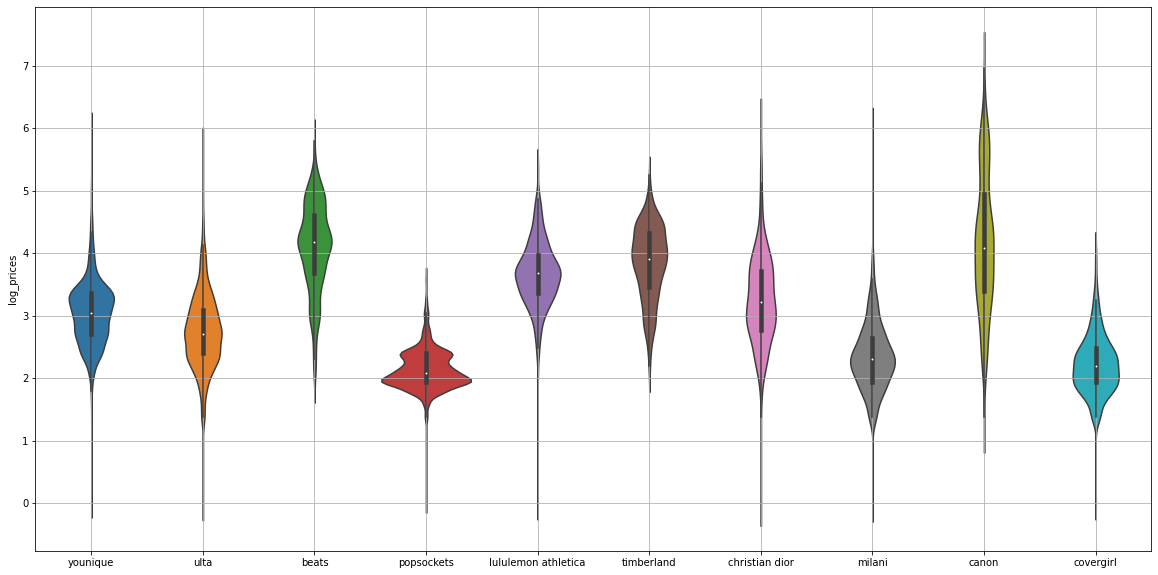

In [ ]:
import seaborn as sns

plt.figure(figsize=(20,10))
sns.violinplot(data=tmp_brand_price)
plt.xticks(list(range(0,len(tmp_brand))),tmp_brand)
plt.ylabel('log_prices')
plt.grid()
plt.show()

## Observatoin:

* From the above 3 plot, we can say that different brand have different target value distribution.
* There are brand like canon which spread over wide range of pricing.
* Brand name field do contain some important information as target values of different brand have different distribution.

## Analysis of category_name feature:

In [ ]:
print('Total number of unique category name : ',len(data['category_name'].unique()))

Total number of unique category name :  1288


In [ ]:
data['category_name'].value_counts().to_frame()

,category_name
"Women/Athletic Apparel/Pants, Tights, Leggings",60177
Women/Tops & Blouses/T-Shirts,46380
Beauty/Makeup/Face,34335
Beauty/Makeup/Lips,29910
Electronics/Video Games & Consoles/Games,26557
...,...
Handmade/Dolls and Miniatures/Primitive,1
Handmade/Pets/Tag,1
Handmade/Patterns/Accessories,1
Home/Kids' Home Store/Nursery Furniture,1


In [ ]:
data['category_name'].value_counts().to_frame().head(10)

,category_name
"Women/Athletic Apparel/Pants, Tights, Leggings",60177
Women/Tops & Blouses/T-Shirts,46380
Beauty/Makeup/Face,34335
Beauty/Makeup/Lips,29910
Electronics/Video Games & Consoles/Games,26557
Beauty/Makeup/Eyes,25215
"Electronics/Cell Phones & Accessories/Cases, Covers & Skins",24676
Women/Underwear/Bras,21274
Women/Tops & Blouses/Blouse,20284
"Women/Tops & Blouses/Tank, Cami",20284


## Observation:

* Total number of unique category name = 1287
* Most of the categories are related to woman accessories in top 10 by count.
* By looking at the Category name field contain three aspect, which are separeted by '/'. 

In [ ]:
# splitting the category_name field into 3 fields main_cat_1, sub_cat_2, sub_cat_3
def len_fun(x):
  try:
    
    return x.split('/',3)
  except:
    
    return 'no label','no label','no label'

temp_category_name = data['category_name'].apply(lambda x: len_fun(x))

data['main_cat_1'],data['sub_cat_2'],data['sub_cat_3']=zip(*temp_category_name)

In [ ]:
data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,log_price,main_cat_1,sub_cat_2,sub_cat_3
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,not known,10.0,1,No description yet,2.397895,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,razer,52.0,0,This keyboard is in great condition and works ...,3.970292,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,not known,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.583519,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,not known,44.0,0,Complete with certificate of authenticity,3.806662,Women,Jewelry,Necklaces


In [ ]:
data['main_cat_1']=data['main_cat_1'].str.lower()
category_name_df=data['main_cat_1'].value_counts().to_frame().reset_index()
category_name_df.rename(columns={'index': 'main_category_name', 'main_cat_1': 'cnt'}, inplace=True)
category_name_df['percentage_of_category_name']=list(map(lambda x:round(x/data.shape[0]*100,2),category_name_df['cnt'].values))
category_name_df

,main_category_name,cnt,percentage_of_category_name
0,women,664385,44.81
1,beauty,207828,14.02
2,kids,171689,11.58
3,electronics,122690,8.28
4,men,93680,6.32
5,home,67871,4.58
6,vintage & collectibles,46530,3.14
7,other,45351,3.06
8,handmade,30842,2.08
9,sports & outdoors,25342,1.71


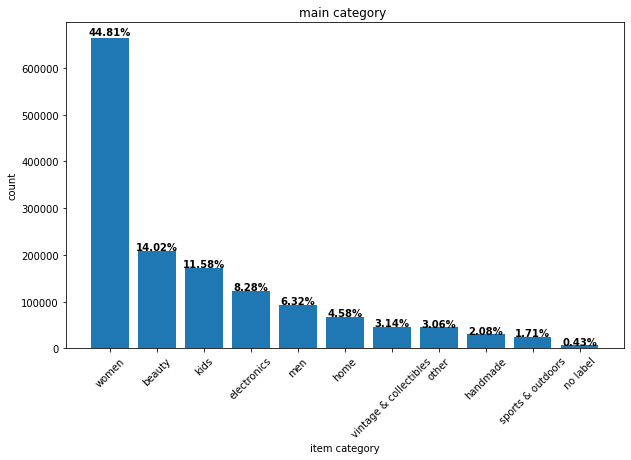

In [ ]:
#reference: https://www.geeksforgeeks.org/display-percentage-above-bar-chart-in-matplotlib/


plt.figure(figsize=(10, 6))

graph = plt.bar(category_name_df.main_category_name,category_name_df.cnt)
plt.title('main category ')
plt.xlabel('item category')
plt.ylabel('count')
plt.xticks(rotation=45)
i = 0
for p in graph:
	width = p.get_width()
	height = p.get_height()
	x, y = p.get_xy()
	plt.text(x+width/2,
			y+height*1.01,
			str(category_name_df.percentage_of_category_name[i])+'%',
			ha='center',
			weight='bold')
	i+=1
plt.show()


## Observation:

* 44.8% of the item in the dataset are related to women.



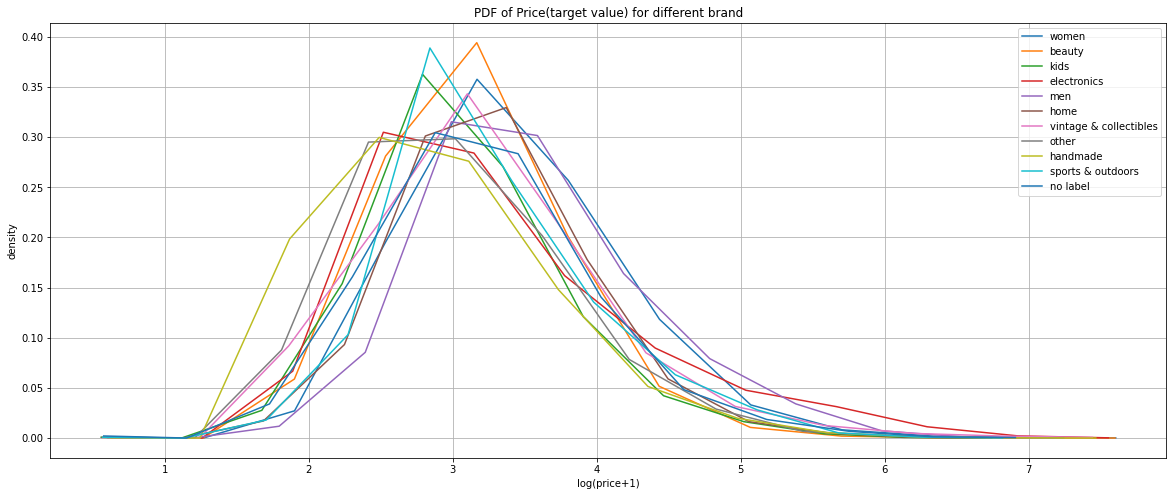

In [ ]:
plt.figure(figsize=(20, 8))
tmp_cat_name=[]
tmp_cat_price=[]
for i in category_name_df.main_category_name.values:

  lg_price=data[data['main_cat_1']==i]['log_price']

  histogram, bins = np.histogram(lg_price, bins=12, density=True)
  #density = True, the result is the value of the probability density function at the bin
  bin_centers = bins[1:]
  pdf = histogram / sum(histogram)
  
  plt.plot(bin_centers, pdf, label=i)
  tmp_cat_name.append(i)
  tmp_cat_price.append(lg_price)




plt.xlabel('log(price+1)')
plt.ylabel('density')
plt.title('PDF of Price(target value) for different brand')
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


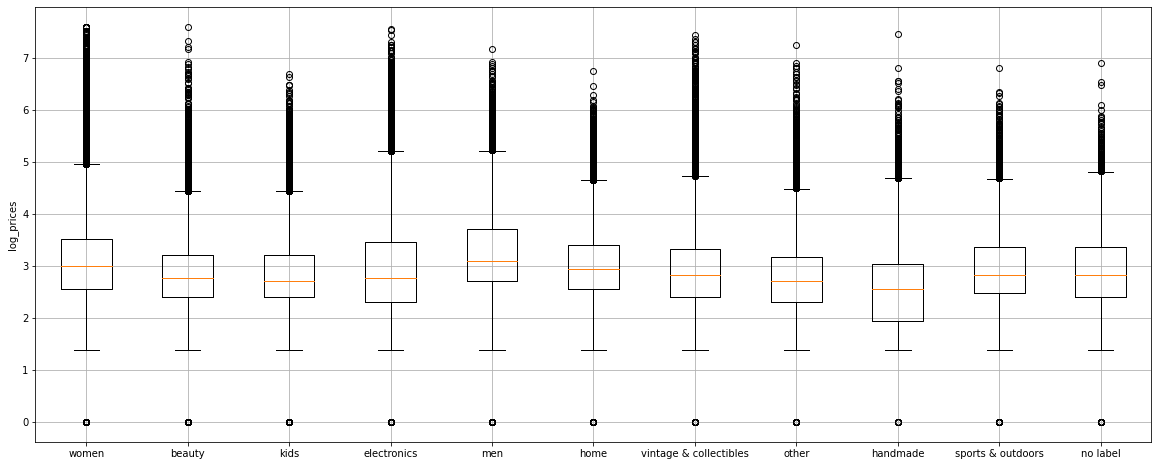

In [ ]:
plt.figure(figsize=(20, 8))
plt.boxplot(tmp_cat_price)
plt.xticks(list(range(1,len(tmp_cat_name)+1)),tmp_cat_name)
plt.ylabel('log_prices')
plt.grid()
plt.show()

## Observation:
* From the above 2 plots, no major takeaway as these distributions are overlapping

In [ ]:
data['sub_cat_2']=data['sub_cat_2'].str.lower()
sub_cat_name_df=data['sub_cat_2'].value_counts().to_frame().reset_index()
sub_cat_name_df.rename(columns={'index': 'sub_cat_2', 'sub_cat_2': 'cnt'}, inplace=True)
sub_cat_name_df['percentage_of_sub_category_name']=list(map(lambda x:round(x/data.shape[0]*100,2),sub_cat_name_df['cnt'].values))
sub_cat_name_df

,sub_cat_2,cnt,percentage_of_sub_category_name
0,athletic apparel,134383,9.06
1,makeup,124624,8.41
2,tops & blouses,106960,7.21
3,shoes,100452,6.78
4,jewelry,61763,4.17
...,...,...,...
109,candles,64,0.00
110,ceramics and pottery,57,0.00
111,dolls and miniatures,49,0.00
112,books and zines,46,0.00


Text(0, 0.5, 'count')

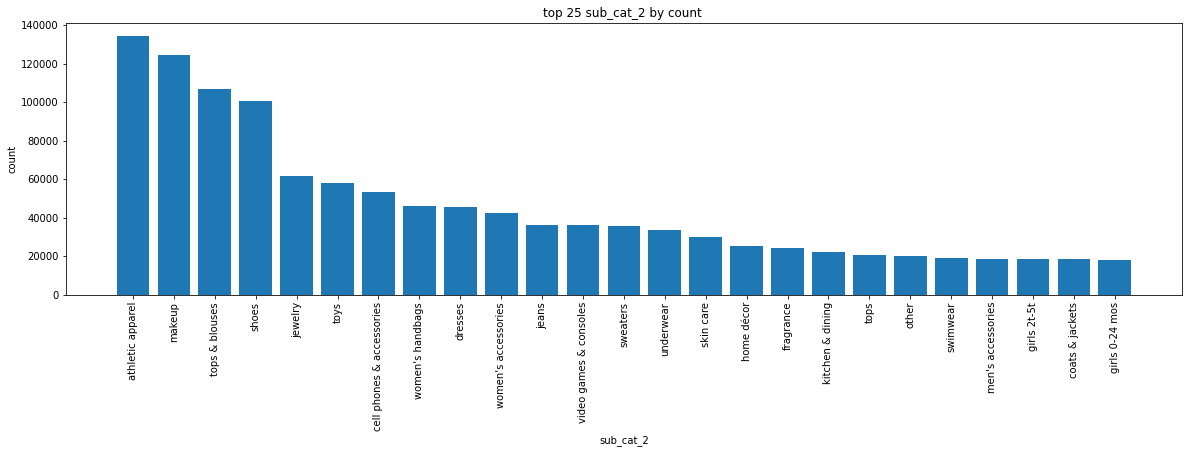

In [ ]:
plt.figure(figsize=(20, 5))

plt.bar(sub_cat_name_df.sub_cat_2[:25],sub_cat_name_df.cnt[:25])
plt.title('top 25 sub_cat_2 by count ')
plt.xticks(rotation=90)
plt.xlabel('sub_cat_2')
plt.ylabel('count')

In [ ]:
data['sub_cat_3']=data['sub_cat_3'].str.lower()
sub_cat_name_df=data['sub_cat_3'].value_counts().to_frame().reset_index()
sub_cat_name_df.rename(columns={'index': 'sub_cat_3', 'sub_cat_3': 'cnt'}, inplace=True)
sub_cat_name_df['percentage_of_sub_category_name']=list(map(lambda x:round(x/data.shape[0]*100,2),sub_cat_name_df['cnt'].values))
sub_cat_name_df

,sub_cat_3,cnt,percentage_of_sub_category_name
0,t-shirts,61488,4.15
1,"pants, tights, leggings",60177,4.06
2,other,50224,3.39
3,face,50171,3.38
4,shoes,32168,2.17
...,...,...,...
865,st patricks,1,0.00
866,garbage disposals,1,0.00
867,decorating,1,0.00
868,pet food,1,0.00


Text(0, 0.5, 'count')

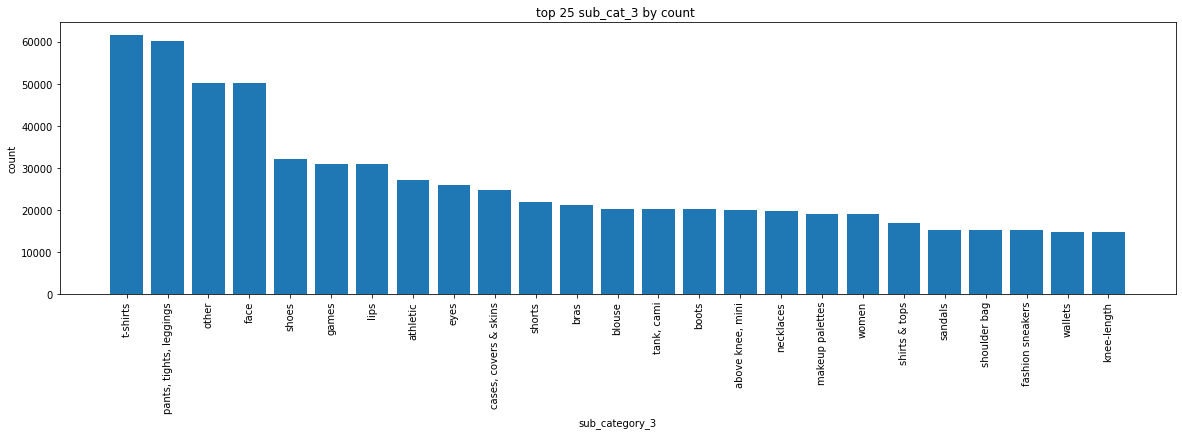

In [ ]:
plt.figure(figsize=(20, 5))

plt.bar(sub_cat_name_df.sub_cat_3[:25],sub_cat_name_df.cnt[:25])
plt.title('top 25 sub_cat_3 by count ')
plt.xticks(rotation=90)
plt.xlabel('sub_category_3')
plt.ylabel('count')

## Observation:
 
 * number of Unique categories in sub_category_3 : 870
 * Most of the items in top 25 are clothing related items.


## Analysis of name field:

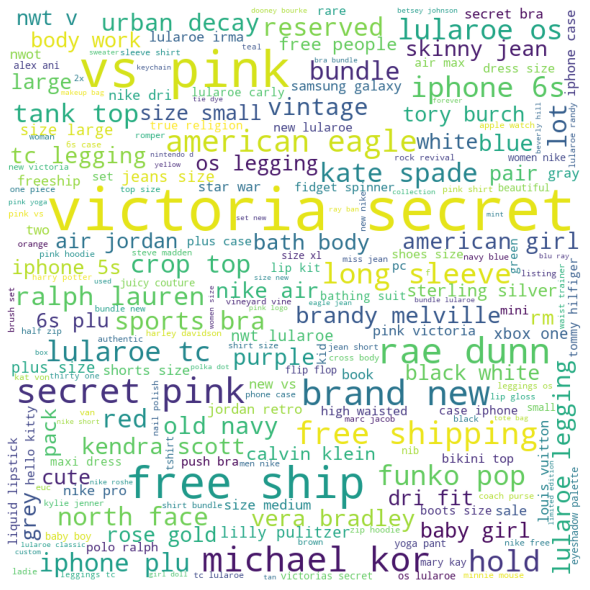

In [ ]:
# reference https://www.geeksforgeeks.org/generating-word-cloud-python/

from wordcloud import WordCloud

txt=' '.join(data['name'].str.lower().values)

wordcloud = WordCloud(width = 800, height = 800,max_words=500,
                background_color ='white',min_font_size = 10).generate(txt)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


##Observation:

* From the above world cloud, we can see few frequent words that sellers are using like "FREE shipping","Brand new" in the name field.
* Brand names like "PINK", "Victoria Secret", "America Eagle","Nike" are most frequently observed in the name field.
* Apple products like "iPhone 5s","iPhone 6s","6s plus" seems to be mostly sold electronic item by the sellars.

In [ ]:
no_of_words=data['name'].str.split().apply(len)
temp=no_of_words.value_counts().to_frame().reset_index()
temp.rename(columns={'index': 'no_of_words', 'name': 'cnt'}, inplace=True)
temp

,no_of_words,cnt
0,4,313585
1,5,291636
2,3,287424
3,6,231559
4,2,161912
5,7,121641
6,8,35970
7,1,31620
8,9,6385
9,10,722


Text(0, 0.5, 'count')

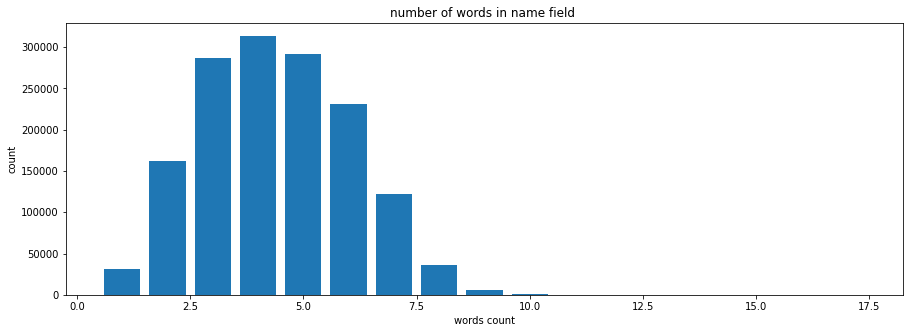

In [ ]:
plt.figure(figsize=(15, 5))

plt.bar(temp.no_of_words,temp.cnt)
plt.title('number of words in name field ')
#plt.xticks(rotation=90)
plt.xlabel('words count')
plt.ylabel('count')

## Observation:
* Most of the sellars have used 3 to 6 words in the name field 

## Analysis of item_description field:

In [ ]:
print('Number of null values :',sum(data['item_description'].isnull()))

Number of null values : 4


In [ ]:
# filling the null values with no data
data['item_description'].fillna(value='no data',inplace=True)

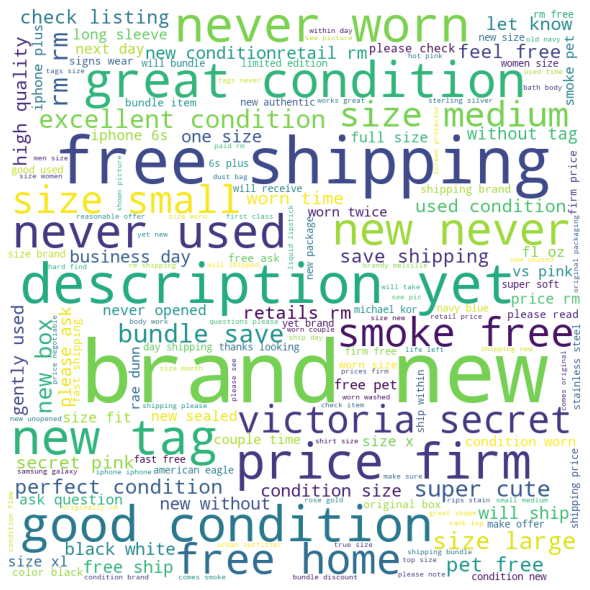

In [ ]:
# reference https://www.geeksforgeeks.org/generating-word-cloud-python/

from wordcloud import WordCloud

txt=' '.join(data['item_description'].str.lower().values)

wordcloud = WordCloud(width = 800, height = 800,max_words=500,
                background_color ='white',min_font_size = 10).generate(txt)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Observation:

* Sellers have used words like "good condition","great condition","perfect condition","never used","never worn","brand new","excellent condition","never opened" to describe the condition of the item.
* "save shipping","free shipping","free home" these words are used by sellers ,this means sellars are willing to pays for shipping

In [ ]:
no_of_words=data['item_description'].str.split().apply(len)
temp=no_of_words.value_counts().to_frame().reset_index()
temp.rename(columns={'index': 'no_of_words', 'item_description': 'cnt'}, inplace=True)
temp

,no_of_words,cnt
0,3,121909
1,6,55542
2,7,53822
3,8,53201
4,4,52640
...,...,...
223,235,1
224,245,1
225,242,1
226,230,1


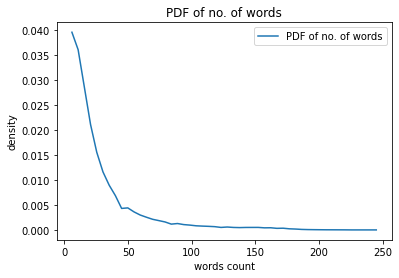

In [ ]:
histogram, bins = np.histogram(no_of_words.values, bins=50, density=True)
#density = True, the result is the value of the probability density function at the bin

bin_centers = bins[1:]

plt.plot(bin_centers, histogram, label="PDF of no. of words")
plt.xlabel('words count')
plt.ylabel('density')
plt.title('PDF of no. of words')
plt.legend()
plt.show()

## Observation:
* From the above we can say that most of the item description have 3 to 50 words.
* Their are only few item description with 100 to 250 words.  

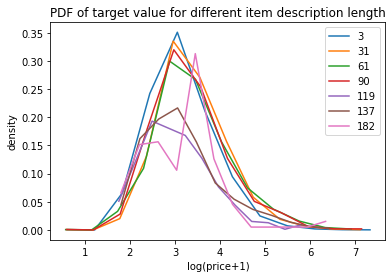

In [ ]:
data['no_of_words_in_item_description']=data['item_description'].str.split().apply(len)

for i in temp['no_of_words'].values[:200:30]:
  
  lg_price = data[data['no_of_words_in_item_description']==i]['log_price'].values
  histogram, bins = np.histogram(lg_price, bins=12, density=True)
  #density = True, the result is the value of the probability density function at the bin
  bin_centers = bins[1:]
  pdf = histogram / sum(histogram)
  plt.plot(bin_centers, pdf, label=i)




plt.xlabel('log(price+1)')
plt.ylabel('density')
plt.title('PDF of target value for different item description length')
plt.legend()
plt.show()

## Observation:
* The above is the plot of PDF's of target value for different number of words in item description.
* Since the PDF's are overlapping, no takeaway, we need to come up with some feature engineering. 

In [ ]:
data.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description', 'log_price', 'main_cat_1',
       'sub_cat_2', 'sub_cat_3', 'no_of_words_in_item_description'],
      dtype='object')

## Interaction features:
item condition & sub category 3

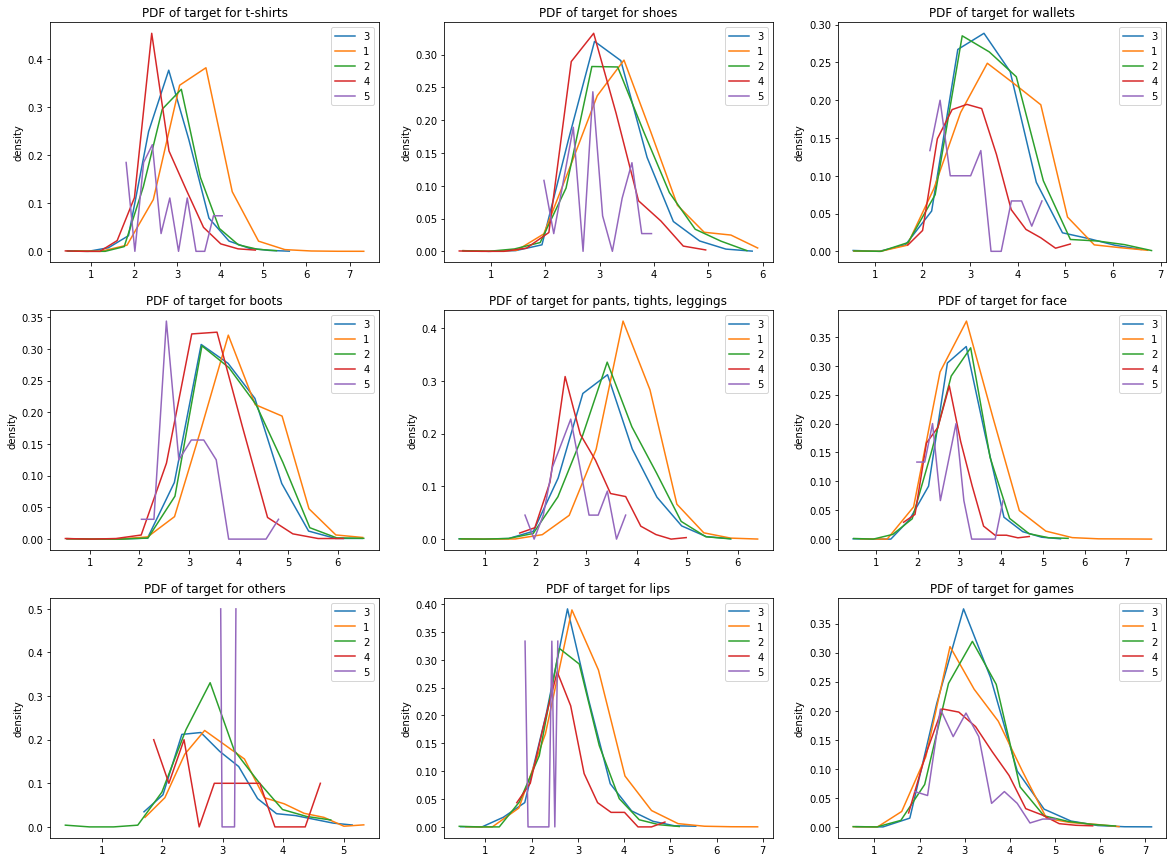

In [ ]:
plt.figure(figsize=(20, 15))

for index,j in enumerate(['t-shirts','shoes','wallets','boots','pants, tights, leggings','face','others','lips','games']):
  #print(index)
  plt.subplot(3,3,index+1)
  for i in data['item_condition_id'].unique():
  
    lg_price=data[(data['item_condition_id']==i) & (data['sub_cat_3']==j)]['log_price']
    #lg_price = data[data['no_of_words_in_item_description']==i]['log_price'].values
    histogram, bins = np.histogram(lg_price, bins=12, density=True)
    #density = True, the result is the value of the probability density function at the bin
    bin_centers = bins[1:]
    pdf = histogram / sum(histogram)
    

    
    plt.plot(bin_centers, pdf, label=i)

  #plt.xlabel('log(price+1)')
  plt.ylabel('density')
  plt.title('PDF of target for '+str(j))
  plt.legend()
plt.show()

## Observation:

* Above are the plots of PDF's of few sub_category_3 for different item condition id.
* if we observe PDF's of 't-shirts', 'wallets', 'pants,tights,leggings','boots','face' , their is slight shift in pdf's of different item condition.
* item condition id = 1 ,is price higher then item condition id = 5.Which indicates products with item conditoin id=1 are good condition compared to the products with item conditoin id=5.

## Interaction feature
shipping and sub category 3

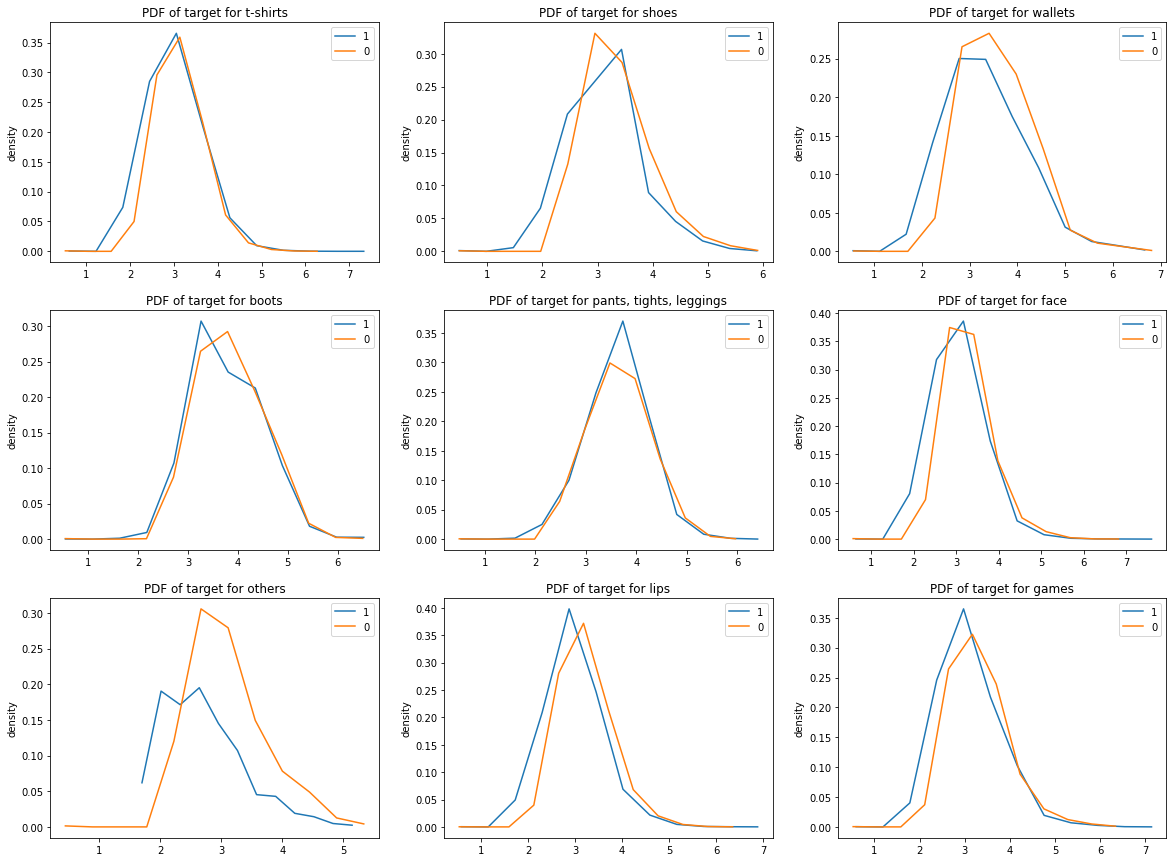

In [ ]:
plt.figure(figsize=(20, 15))

for index,j in enumerate(['t-shirts','shoes','wallets','boots','pants, tights, leggings','face','others','lips','games']):
  #print(index)
  plt.subplot(3,3,index+1)
  for i in data['shipping'].unique():
  
    lg_price=data[(data['shipping']==i) & (data['sub_cat_3']==j)]['log_price']
    #lg_price = data[data['no_of_words_in_item_description']==i]['log_price'].values
    histogram, bins = np.histogram(lg_price, bins=12, density=True)
    #density = True, the result is the value of the probability density function at the bin
    bin_centers = bins[1:]
    pdf = histogram / sum(histogram)
    

    
    plt.plot(bin_centers, pdf, label=i)

  #plt.xlabel('log(price+1)')
  plt.ylabel('density')
  plt.title('PDF of target for '+str(j))
  plt.legend()
plt.show()

## Observation:

* > if shipping = 1 delivery fee is paid by seller 

  > if shipping = 0 delivery fee is  paid by buyer

  
* For most of the item when shipping=0 (i.e when delivery fee paid by the buyer ) the pricing is the item is slightly higher compared to the item when shipping=1.

# Summary of EDR:


* 42.6% of brand name data is missing.So, treated it as a separate category.

* It was observed that most of the pricing of items that are sold in mercari's app value lie between 0 to 200.
Their are only few item whose pricing from 200 to 2000.

* The target value(price) have right skewed distribution. (has a long right tail).


* To convert right skewed data to noraml distribution we have used simple transformations on target data like square root, cube root, and log, out-off log tranformation on target value was more like normal distribution.

* We have choosen RMSLE as our loss function because of it's properties.

* It was observed that most of the time shipping cost is paid by sellers when pricing of the item is low and when price is high most of the times Shipping cost is paid by buyers.

* 43.2% of the item/product in the 
dataset are rated with item condition as 1.

* It was observed that their are items which are priced as zero.

* Their are brands whose item pricing fall in large range like victoria's secret, apple, michael kors.

* can say that different brand have different target value distribution.
* There are brand like canon which spread over wide range of pricing.
* Brand name field do contain some important information as target values of different brand have different distribution.

* 44.8% of the item in the dataset are related to women.

* Sellers have used words like "good condition","great condition","brand new","excellent condition",etc. to describe the condition of the item in item description.

* Most of the item description have 3 to 50 words. Their are only few item description with 100 to 250 words.  


* Items with item condition id = 1 ,is price higher then item condition id = 5 for same category products.Which indicates products with item conditoin id=1 are good condition compared to the products with item conditoin id=5.


* For most of the item when shipping=0 (i.e when delivery fee paid by the buyer ) the pricing is the item is slightly higher compared to the item when shipping=1.





## Improvements:

### Outlier analysis on price (target feature)

In [ ]:
# considering 99.9 percentile of price value as threshold for as outliers
temp_var = np.percentile(data['price'].values,99.9)
print('Total number of data points :',data.shape[0])
temp_cnt=sum(data['price'].values<=temp_var)
print('number of data points whose price is lesser then 99.9 ({}) percentile of price : {}'.format(temp_var,temp_cnt))
print('number of data points whose price is greater then 99.9 ({}) percentile of price : {}'.format(temp_var,data.shape[0]-temp_cnt))

Total number of data points : 1482535
number of data points whose price is lesser then 99.9 (450.0) percentile of price : 1481094
number of data points whose price is greater then 99.9 (450.0) percentile of price : 1441


#### Observation:
* If we consider price greater then  450 as outliers, then we have 1441 outliers .  

### Outlier analysis on word count of item description

In [ ]:
# filling the null values with no data
data['item_description'].fillna(value='no data',inplace=True)

In [ ]:
# considering 99.9 percentile of number of words value as threshold for as outliers

no_of_words=data['item_description'].str.split().apply(len)
temp=no_of_words.value_counts().to_frame().reset_index()
temp.rename(columns={'index': 'no_of_words', 'item_description': 'cnt'}, inplace=True)
temp

,no_of_words,cnt
0,3,121909
1,6,55542
2,7,53822
3,8,53201
4,4,52640
...,...,...
223,235,1
224,245,1
225,242,1
226,230,1


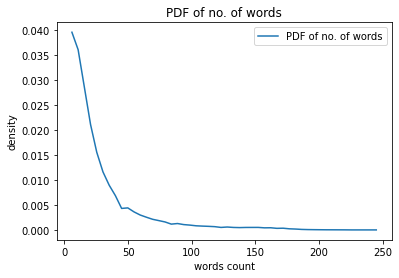

In [ ]:
histogram, bins = np.histogram(no_of_words.values, bins=50, density=True)
#density = True, the result is the value of the probability density function at the bin

bin_centers = bins[1:]

plt.plot(bin_centers, histogram, label="PDF of no. of words")
plt.xlabel('words count')
plt.ylabel('density')
plt.title('PDF of no. of words')
plt.legend()
plt.show()

In [ ]:
for i in range(0,101,25):
  print("{} th percentile of price : {}".format(i,np.percentile(no_of_words.values,i)))

0 th percentile of price : 1.0
25 th percentile of price : 7.0
50 th percentile of price : 15.0
75 th percentile of price : 31.0
100 th percentile of price : 245.0


In [ ]:
for i in range(90,101,1):
  print("{} th percentile of price : {}".format(i,np.percentile(no_of_words.values,i)))

90 th percentile of price : 61.0
91 th percentile of price : 65.0
92 th percentile of price : 70.0
93 th percentile of price : 76.0
94 th percentile of price : 83.0
95 th percentile of price : 91.0
96 th percentile of price : 102.0
97 th percentile of price : 115.0
98 th percentile of price : 134.0
99 th percentile of price : 155.0
100 th percentile of price : 245.0


In [ ]:
for i in range(0,11,1):
  print("{} th percentile of price : {}".format((99+(i/10)),np.percentile(no_of_words.values,(99+(i/10)))))

99.0 th percentile of price : 155.0
99.1 th percentile of price : 157.0
99.2 th percentile of price : 159.0
99.3 th percentile of price : 162.0
99.4 th percentile of price : 164.0
99.5 th percentile of price : 167.0
99.6 th percentile of price : 170.0
99.7 th percentile of price : 173.0
99.8 th percentile of price : 179.0
99.9 th percentile of price : 189.0
100.0 th percentile of price : 245.0


In [ ]:
sum(no_of_words.values>189)

1374

#### Observation:
* Max number of words in item description = 245 
* If we consider 99.9 percentile (189) as the threshold for outliers, then we end by leaving 1374 data points.

## Trying to fill the missing values of brand_name feature using text data

In [ ]:
data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [ ]:
# brand name  count 
temp_brand=data['brand_name'].value_counts()
temp=temp_brand.to_frame().reset_index()
temp.rename(columns={'index': 'brand', 'brand_name': 'cnt'}, inplace=True)
temp

,brand,cnt
0,PINK,54088
1,Nike,54043
2,Victoria's Secret,48036
3,LuLaRoe,31024
4,Apple,17322
...,...,...
4804,The Learning Journey,1
4805,Pampers Baby Fresh,1
4806,Huggies One & Done,1
4807,Classic Media,1


In [ ]:
temp[:15]

,brand,cnt
0,PINK,54088
1,Nike,54043
2,Victoria's Secret,48036
3,LuLaRoe,31024
4,Apple,17322
5,FOREVER 21,15186
6,Nintendo,15007
7,Lululemon,14558
8,Michael Kors,13928
9,American Eagle,13254


### Observation:
* For predicating the brand name with high accuracy we should have sufficient data point of each brand, which is not their in our case.
* For the top 12 brands we have more than 12000 points for each brand.
* So, we are considering top 12 brands by count for training, to predict the brand name for missing values.


In [ ]:
tp_16_brands = temp[temp['cnt']>12000]['brand'].values
# getting top 12 brand data (which only include name and item description and corresponding brand name)
tp_brand_data = data[data['brand_name'].apply(lambda x: x in tp_16_brands)][['name','item_description','brand_name']]

In [ ]:
X_tp_brand=tp_brand_data[['name','item_description']]
y_tp_brand=tp_brand_data['brand_name']

In [ ]:
X_missing_brand_data = data[data['brand_name'].isnull()][['train_id','name','item_description']]
nan_brd_train_id = X_missing_brand_data['train_id']
X_missing_brand_data = X_missing_brand_data[['name','item_description']]

#### text pre-processing for brand predication

In [ ]:
# concatenating strings
X_tp_brand_txt_data       = X_tp_brand['name']+' '+X_tp_brand['item_description']
X_missing_brand_txt_data  = X_missing_brand_data['name']+' '+X_missing_brand_data['item_description']
# converting to lower case
X_tp_brand_txt_data = X_tp_brand_txt_data.str.lower()
X_missing_brand_txt_data= X_missing_brand_txt_data.str.lower()


In [ ]:
# removing stopwords from text
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

def rm_stp_wds(sentence):
  temp_lst=[]
  for word in sentence.split(' '):
    if word not in stopwords:
      temp_lst.append(word)
  return ' '.join(temp_lst)

X_pre_process_txt = X_tp_brand_txt_data.apply(lambda x : rm_stp_wds(x))
X_nan_brd_pre_process_txt = X_missing_brand_txt_data.apply(lambda x : rm_stp_wds(x))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# replacing '_' with space
X_pre_process_txt = X_pre_process_txt.str.replace('_',' ')
X_nan_brd_pre_process_txt = X_nan_brd_pre_process_txt.str.replace('_',' ')

In [ ]:
import regex as re
'''
 replace all the words except "A-Za-z_" with space. 
'''
def extract_words(input_data=' '):
    '''
    this function replace all the words except "A-Za-z_" with space
    '''
    pattern_17='\s{0,1}[A-Za-z_]+\s{0,1}'
    regex_17 = re.compile(pattern_17)
    xt=input_data.split()
    #print(xt)
    tmp_list=[]
    for i in xt:
        t=regex_17.fullmatch(i.strip())
        if t!=None:
            tmp_list.append(t.group())
    
    return ' '.join(tmp_list)


X_filtered_txt = X_pre_process_txt.apply(lambda x : extract_words(x))
X_nan_brd_filter_txt = X_nan_brd_pre_process_txt.apply(lambda x : extract_words(x))

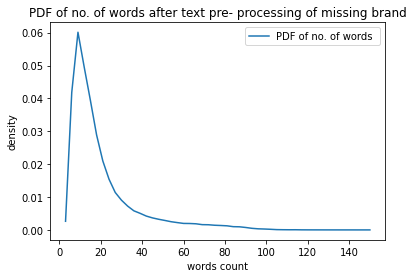

In [ ]:
# plotting pdf of number of words after pre-processing

no_of_words=X_nan_brd_filter_txt.str.split().apply(len)

histogram, bins = np.histogram(no_of_words.values, bins=50, density=True)
#density = True, the result is the value of the probability density function at the bin

bin_centers = bins[1:]

plt.plot(bin_centers, histogram, label="PDF of no. of words ")
plt.xlabel('words count')
plt.ylabel('density')
plt.title('PDF of no. of words after text pre- processing of missing brand')
plt.legend()
plt.show()

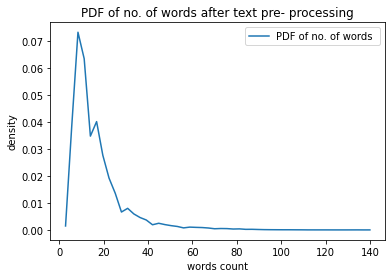

In [ ]:
# plotting pdf of number of words after pre-processing

no_of_words=X_filtered_txt.str.split().apply(len)

histogram, bins = np.histogram(no_of_words.values, bins=50, density=True)
#density = True, the result is the value of the probability density function at the bin

bin_centers = bins[1:]

plt.plot(bin_centers, histogram, label="PDF of no. of words ")
plt.xlabel('words count')
plt.ylabel('density')
plt.title('PDF of no. of words after text pre- processing')
plt.legend()
plt.show()

#### Observation:
* The distribution of above 2 plots are similar.(number of words in top 12 brand and missing brand name)
* The max number of words is reduced to 140 after pre-processing.

In [ ]:
# applying  Stemming on text 
from nltk.stem.porter import PorterStemmer

porter_stemmer = PorterStemmer()

def stemming(txt):
  stem_txt = [porter_stemmer.stem(word) for word in txt.split(' ')]
  return ' '.join(stem_txt)

X_stm_train  = X_filtered_txt.apply(lambda x: stemming(x))
X_nan_brd_stm_txt = X_nan_brd_filter_txt.apply(lambda x: stemming(x))

In [ ]:
# applying Lemmatization on text data
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(txt):
  
  lem_txt = [wordnet_lemmatizer.lemmatize(word) for word in txt.split(' ')]
  return ' '.join(lem_txt)
  
X_train_final = X_stm_train.apply(lambda x:lemmatizer(x))
X_nan_brd_final = X_nan_brd_stm_txt.apply(lambda x:lemmatizer(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_final,y_tp_brand, test_size=0.20, random_state=42,stratify=y_tp_brand)

for i in [X_train, X_test, y_train, y_test]:
  print(i.shape)

(240738,)
(60185,)
(240738,)
(60185,)


In [ ]:
y_train.value_counts()

PINK                 43270
Nike                 43234
Victoria's Secret    38429
LuLaRoe              24819
Apple                13858
FOREVER 21           12149
Nintendo             12006
Lululemon            11646
Michael Kors         11142
American Eagle       10603
Rae Dunn              9844
Sephora               9738
Name: brand_name, dtype: int64

In [ ]:
y_test.value_counts()

PINK                 10818
Nike                 10809
Victoria's Secret     9607
LuLaRoe               6205
Apple                 3464
FOREVER 21            3037
Nintendo              3001
Lululemon             2912
Michael Kors          2786
American Eagle        2651
Rae Dunn              2461
Sephora               2434
Name: brand_name, dtype: int64

In [ ]:
# bag of words : converting text to numeric data
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=50)
X_cnt_vect_train = vectorizer.fit_transform(X_train.values)

X_cnt_vect_test = vectorizer.transform(X_test.values)

X_cnt_vect_nan_brd = vectorizer.transform(X_nan_brd_final)


In [ ]:
#print(vectorizer.get_feature_names())
len(vectorizer.get_feature_names()[:])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


3119

In [ ]:
# target value(beand name) label encoding
from sklearn import preprocessing
 
label_encoder = preprocessing.LabelEncoder()

y_train_final= label_encoder.fit_transform(y_train)
y_test_final= label_encoder.transform(y_test)

keys = label_encoder.classes_
values = label_encoder.transform(label_encoder.classes_)
dictionary = dict(zip(keys, values))
dictionary

{'American Eagle': 0,
 'Apple': 1,
 'FOREVER 21': 2,
 'LuLaRoe': 3,
 'Lululemon': 4,
 'Michael Kors': 5,
 'Nike': 6,
 'Nintendo': 7,
 'PINK': 8,
 'Rae Dunn': 9,
 'Sephora': 10,
 "Victoria's Secret": 11}

In [ ]:
# applying Multinomial navie bayes on text data

from sklearn.naive_bayes import MultinomialNB

M_NB  = MultinomialNB(alpha=0.05,class_prior=[0.5]*12)
model_NB = M_NB.fit(X_cnt_vect_train, y_train_final)
model_NB_predictions = model_NB.predict(X_cnt_vect_test)

In [ ]:
print('Accuracy : ',sum(model_NB_predictions==y_test_final)/len(y_test_final))

Accuracy :  0.8879953476779928


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


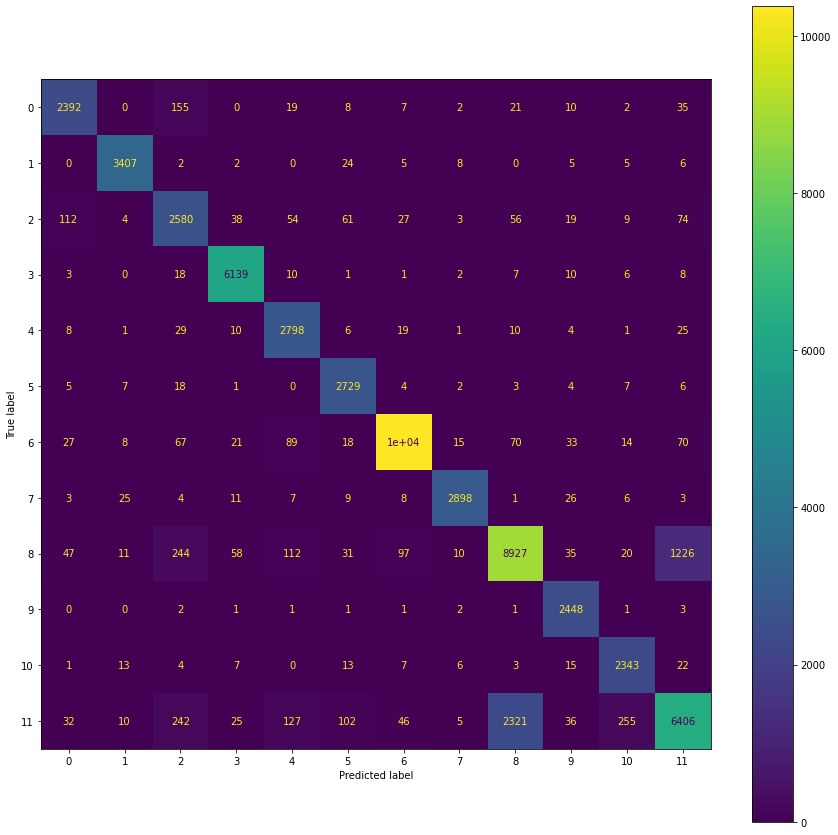

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(15, 15)) 
plot_confusion_matrix(M_NB, X_cnt_vect_test, y_test_final,ax=ax)  

plt.show()


###Observations:
* From the above confusion matrix we can say that model is performing pretty good, except for 8 and 11 labels.
* "Having no data is better then having wrong data", thus we want our model to perform at the best.
*Below is the code for tweaking threshold probability to improve accuracy of the model.

In [ ]:
accuracy_thrd=[]
crt_prd_cnt=[]
wrg_prd_cnt=[]
nt_prd_cnt=[]
prb_thrd_lst=[0.5,0.6,0.7,0.8,0.9,0.95,0.99,0.999,0.9999,0.99999,1]
for prob_threshold in prb_thrd_lst:

  correct_predicated=0
  wrong_predicated=0
  not_predicated=0
  for prob,label in zip(M_NB.predict_proba(X_cnt_vect_test),y_test_final):
    x= prob>= prob_threshold   #returns [False,  True, False, False, False, False, False, False, False, False, False, False]
    if (any(x)):
      pred_label=x.argmax()
      if(pred_label==label):
        correct_predicated=correct_predicated+1
      else:
        wrong_predicated=wrong_predicated+1
    else:
      not_predicated=not_predicated+1

  crt_prd_cnt.append(correct_predicated)
  wrg_prd_cnt.append(wrong_predicated)
  nt_prd_cnt.append(not_predicated)
  accuracy_thrd.append(correct_predicated/(wrong_predicated+correct_predicated))



In [ ]:
from prettytable import PrettyTable

columns = ["prob. threshold", "correct predicated cnt", "wrong predicated cnt","not predicated","% of correct predicated ",\
           "% of not predicated "]

myTable = PrettyTable()

# Add Columns
myTable.add_column(columns[0],prb_thrd_lst)
myTable.add_column(columns[1],crt_prd_cnt)
myTable.add_column(columns[2],wrg_prd_cnt)
myTable.add_column(columns[3],nt_prd_cnt )
myTable.add_column(columns[4],list(map(lambda x: round(x,4),accuracy_thrd)))
myTable.add_column(columns[5],list(map(lambda x: round(x,4),np.array(nt_prd_cnt)/len(y_test_final))))

print(myTable)


+-----------------+------------------------+----------------------+----------------+--------------------------+----------------------+
| prob. threshold | correct predicated cnt | wrong predicated cnt | not predicated | % of correct predicated  | % of not predicated  |
+-----------------+------------------------+----------------------+----------------+--------------------------+----------------------+
|       0.5       |         53041          |         5829         |      1315      |          0.901           |        0.0218        |
|       0.6       |         52203          |         5093         |      2889      |          0.9111          |        0.048         |
|       0.7       |         51158          |         4369         |      4658      |          0.9213          |        0.0774        |
|       0.8       |         49791          |         3672         |      6722      |          0.9313          |        0.1117        |
|       0.9       |         47551          |         28

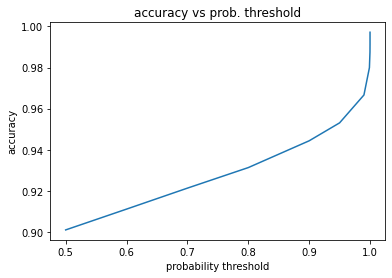

In [ ]:
import matplotlib.pyplot as plt

x = prb_thrd_lst
y = accuracy_thrd
plt.plot(x, y)
plt.xlabel('probability threshold')
plt.ylabel('accuracy')
plt.title('accuracy vs prob. threshold')
plt.show()


### Observation:
* When probability threshold = 0.99999 ,the accuracy of predicated points = 99.15 % which is a good number.
* The percentage of not predicated points is 54.8%; Its ok to not to predicate when not sure rather then wrong predication.


In [ ]:
# predicating the probabilty for missing values
nan_brand_proba_predictions = model_NB.predict_proba(X_cnt_vect_nan_brd)

In [ ]:
best_prob_threshold=0.99999
nan_brand_labels=[]
predicated_ids=[]
not_predicated=0
for prob,id in zip(nan_brand_proba_predictions,nan_brd_train_id.values):
  x= prob >= best_prob_threshold   #returns [False,  True, False, False, False, False, False, False, False, False, False, False]
  
  if (any(x)):
    pred_label=x.argmax()
    nan_brand_labels.append(pred_label)
    predicated_ids.append(id)
  else:
    not_predicated=not_predicated+1

In [ ]:
print('Number of predications : ',len(nan_brand_labels))
print('Number of no predications : ',not_predicated)
print('percentage of values predicated : {:.2f} %'.format((len(nan_brand_labels)/len(nan_brd_train_id.values))*100))

Number of predications :  158386
Number of no predications :  474296
percentage of values predicated : 25.03 %


### Observation:

* We are able to predicate brand name for 158386 data points which is 25% of the missing value with 0.99999 as probability threshold.

In [ ]:
nan_pred_labels = label_encoder.inverse_transform(nan_brand_labels)
indices = list(data[data['train_id'].isin(predicated_ids)].index)


In [ ]:
data.loc[indices,['brand_name']]=nan_pred_labels

In [ ]:
#sum(data['brand_name'].isnull())
#data.to_csv('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/pre_processed_data.csv', header=False, index=False)

##Summuary on improvements:

* By using text data (item_description and name feature) of top 12 brand by count in dataset we are able to fill 25% of the missing values of brand_name feature.
* The 99.9 percent of data points have less then eaual to 189  number of words in item description,
if we consider 189 as the threshold for outliers, then we end by leaving 1374 data points.

* The 99.9 percent of data points have less then or eaual to 450  price of the items, if we consider 450 as the threshold for outliers, then we end by leaving 1441 data points.


## Feature *Engineering*

### is digit present or not in text data


In [ ]:
data['dup_item_description']=data['item_description']
data['dup_item_description'].fillna(value='no data', inplace=True)


In [ ]:
import re
def has_digits(txt):
    #print('hello')
    return bool(re.search(r'\d', txt))+0

txt_data =  data['name']+' '+data['dup_item_description']

data['is_digit_present_txt'] =txt_data.apply(lambda x: has_digits(x))



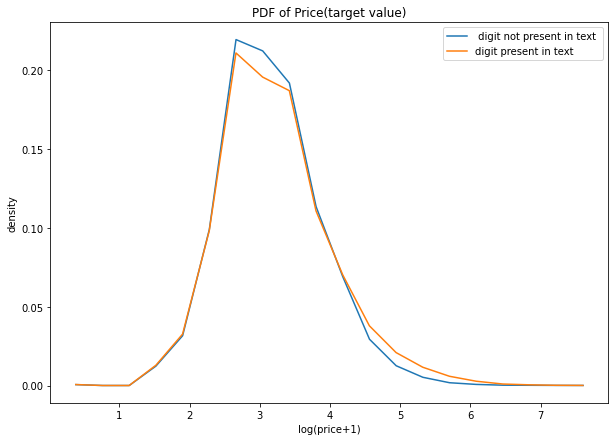

In [ ]:
data['log_price']=np.log(data['price']+1)
isdigit_present_0_price = data[data['is_digit_present_txt']==0]['log_price'].values
isdigit_present_1_price = data[data['is_digit_present_txt']==1]['log_price'].values

plt.figure(figsize=(10, 7))
histogram, bins = np.histogram(isdigit_present_0_price, bins=20, density=True)
#density = True, the result is the value of the probability density function at the bin
bin_centers = bins[1:]
pdf = histogram / sum(histogram)
plt.plot(bin_centers, pdf, label=" digit not present in text ")

histogram, bins = np.histogram(isdigit_present_1_price, bins=20, density=True)
bin_centers = bins[1:]
pdf = histogram / sum(histogram)
plt.plot(bin_centers, pdf, label="digit present in text ")

plt.xlabel('log(price+1)')
plt.ylabel('density')
plt.title('PDF of Price(target value)')
plt.legend()
plt.show()

#### Observation:
* Is digit present in text data or not. This feature does not seems to be useful feature. As the above pdf plots are overlapping.

### K mode clustering on category name :

In [ ]:
!pip install kmodes
from kmodes.kmodes import KModes

In [ ]:
# splitting the category_name field into 3 fields main_cat, sub_cat_1, sub_cat_2
def len_fun(x):
  try:
    
    return x.split('/',3)
  except:
    
    return 'no label','no label','no label'

temp_category_name = data['category_name'].apply(lambda x: len_fun(x))

data['main_cat'],data['sub_cat_1'],data['sub_cat_2']=zip(*temp_category_name)

In [ ]:
temp_data = data[['main_cat','sub_cat_1','sub_cat_2']]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 125730, cost: 2587766.0
Run 1, iteration: 2/100, moves: 0, cost: 2587766.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 209612, cost: 2003026.0
Run 1, iteration: 2/100, moves: 284244, cost: 2003026.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 376576, cost: 1821766.0
Run 1, iteration: 2/100, moves: 17286, cost: 1821766.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 234002, cost: 1652421.0
Run 1, iteration: 2/100, moves: 14612, cost: 1638464.0
Run 1, iteration: 3/100, moves: 2, cost: 1638464.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 86055, cost: 1619765.0
Run 1, iteration: 2/100, moves: 1696, cost: 1619765.0

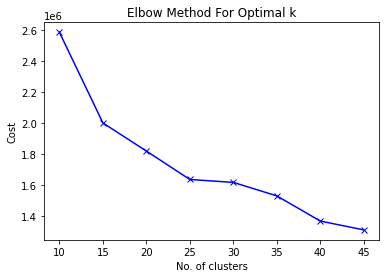

In [ ]:
## reference https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/
from kmodes.kmodes import KModes
cost = []
K = range(10,50,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 1, verbose=1)
    kmode.fit_predict(temp_data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

* Thumb rule to select k for cluster is elbow method

In [ ]:
kmode = KModes(n_clusters=25, init = "random", n_init = 1, verbose=1)
clusters = kmode.fit_predict(temp_data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 120324, cost: 1717938.0
Run 1, iteration: 2/100, moves: 13, cost: 1717938.0


In [ ]:
data.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description', 'main_cat', 'sub_cat_1',
       'sub_cat_2', '25_clusters_'],
      dtype='object')

In [ ]:
data['log_price']=np.log(data['price']+1)

In [ ]:
data['25_clusters_']=clusters

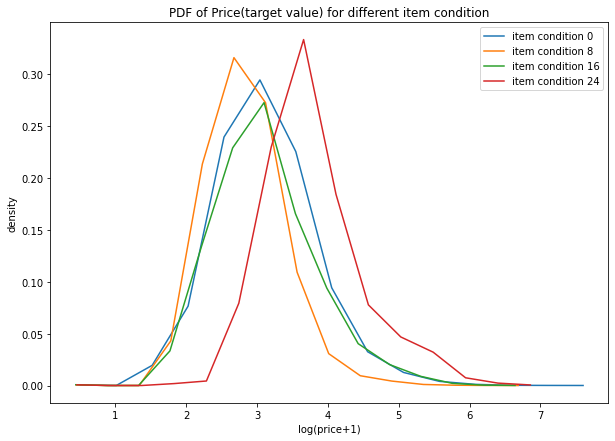

In [ ]:
plt.figure(figsize=(10, 7))

for i in list(range(0,26,8)):
  histogram, bins = np.histogram(data[data['25_clusters_']==i]['log_price'], bins=15, density=True)
  #density = True, the result is the value of the probability density function at the bin
  bin_centers = bins[1:]
  pdf = histogram / sum(histogram)
  plt.plot(bin_centers, pdf, label='item condition '+str(i))

plt.xlabel('log(price+1)')
plt.ylabel('density')
plt.title('PDF of Price(target value) for different item condition')
plt.legend()
plt.show()

In [ ]:
kmode = KModes(n_clusters=40, init = "random", n_init = 1, verbose=1)
clusters = kmode.fit_predict(temp_data)
data['40_clusters_']=clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 140380, cost: 1410963.0
Run 1, iteration: 2/100, moves: 520, cost: 1410963.0


/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


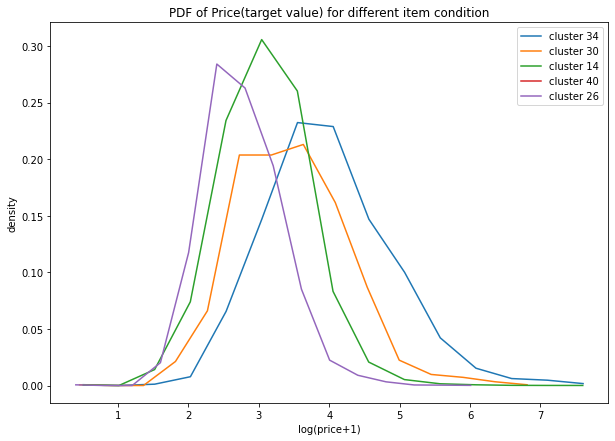

In [ ]:
import random

plt.figure(figsize=(10, 7))

for i in list(random.sample(range(0, 41), 5)):
  histogram, bins = np.histogram(data[data['40_clusters_']==i]['log_price'], bins=15, density=True)
  #density = True, the result is the value of the probability density function at the bin
  bin_centers = bins[1:]
  pdf = histogram / sum(histogram)
  plt.plot(bin_centers, pdf, label='cluster '+str(i))

plt.xlabel('log(price+1)')
plt.ylabel('density')
plt.title('PDF of Price(target value) for different item condition')
plt.legend()
plt.show()

#### Observation:
* Above are the plots of pdf of target value for different cluster.
* Features used for Kmode clustering: 
  * 'main_cat'
  * 'sub_cat_1'
  * 'sub_cat_2'

* Since central tendency of the above pdf's are different , this feature can be handy for modeling.

In [ ]:
data.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description', 'log_price'],
      dtype='object')

In [ ]:
# these are features used for kmode algorithm 
temp2_data = data[['item_condition_id','shipping','main_cat','sub_cat_1']]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 240089, cost: 1649501.0
Run 1, iteration: 2/100, moves: 179, cost: 1649501.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 210960, cost: 1349067.0
Run 1, iteration: 2/100, moves: 4, cost: 1349067.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 259175, cost: 1312321.0
Run 1, iteration: 2/100, moves: 30519, cost: 1312321.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 208654, cost: 1191167.0
Run 1, iteration: 2/100, moves: 1555, cost: 1191167.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 235233, cost: 1157330.0
Run 1, iteration: 2/100, moves: 26251, cost: 1157330.0
Init: initializing centroids
Init: initializing clus

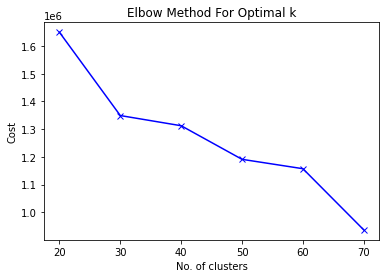

In [ ]:
## reference https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/
from kmodes.kmodes import KModes
cost = []
K = range(20,80,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 1, verbose=1)
    kmode.fit_predict(temp2_data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kmode = KModes(n_clusters=70, init = "random", n_init = 1, verbose=1)
clusters = kmode.fit_predict(temp2_data)
data['70_clusters_']=clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 195445, cost: 1084250.0
Run 1, iteration: 2/100, moves: 10, cost: 1084250.0


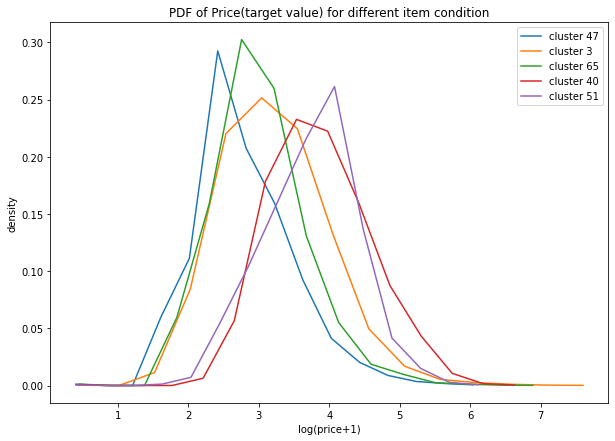

In [ ]:
import random

plt.figure(figsize=(10, 7))

for i in list(random.sample(range(0, 70), 5)):
  histogram, bins = np.histogram(data[data['70_clusters_']==i]['log_price'], bins=15, density=True)
  #density = True, the result is the value of the probability density function at the bin
  bin_centers = bins[1:]
  pdf = histogram / sum(histogram)
  plt.plot(bin_centers, pdf, label='cluster '+str(i))

plt.xlabel('log(price+1)')
plt.ylabel('density')
plt.title('PDF of Price(target value) for different item condition')
plt.legend()
plt.show()

#### Observation:

* Above are the plots of pdf of target value for different cluster.
* Features used for Kmode clustering: 
  * 'item_condition_id'
  * 'shipping' 
  * 'main_cat'
  * 'sub_cat_1'
* Since central tendency of the above pdf's are different , this feature can be handy for modeling.

## Data Processing and Feature Engineering

* Removing the datapoints whose prices are <=0
* Apply log Transform on target values.
* Handle missing values in brand name 
  * By taking missing value as a separate category.
  * By using item description and name feature to predicate brand name using simple model.
* Text (item description + name ) len
* Data pre-processing
* Applying Kmodes algorithm on category features which gives us interactive features.
* One-hot encoding of categorial features


In [ ]:
data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [ ]:
data.shape

(1482535, 8)

In [ ]:
# removing the datapoints whose price is less then equal to zero
train_data = data[data['price']>0].copy()
train_data.shape

(1481661, 8)

In [ ]:
print('Number of points removed : ', data.shape[0]-train_data.shape[0])

Number of points removed :  874


### Price --> log(price)

In [ ]:
# as explained earlier why log(price) in EDA 
train_data['log_price'] = np.log(train_data['price'].values+1)

### Train - Validation split  

In [ ]:
train_data.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description', 'log_price'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

y = train_data['log_price']
X = train_data.drop(['log_price'], axis=1)

X_train, X_validation, y_train, y_validationt = train_test_split(X, y, test_size=0.10, random_state=30)

print('X_train :',X_train.shape)
print('y_train : ',y_train.shape)
print('X_validation : ',X_validation.shape)
print('y_validationt :',y_validationt.shape)

### category_name

In [ ]:
# splitting the category_name field into 3 fields main_category, sub_category_1, sub_category_2

def len_fun(x):
  try:
    return x.split('/',3)
  except:
    return 'no label','no label','no label'

temp_category_name = X_train['category_name'].apply(lambda x: len_fun(x))

X_train['main_category'],X_train['sub_category_1'],X_train['sub_category_2']=zip(*temp_category_name)

X_train = X_train.drop(['category_name'], axis=1)

X_train.head(2)

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,main_category,sub_category_1,sub_category_2
610488,610488,Hollister Paisley Flowy Top,2,Hollister,10.0,1,Hollister brand | Size: M | Polyester blend | ...,Women,Tops & Blouses,Blouse
565926,565926,Sparkle Styling Kit For Horses,1,American Boy & Girl,26.0,0,New with box. Box is a bit crushed from storing.,Kids,Toys,Dolls & Accessories


### brand_name

In [ ]:
# filling the missing values 

X_train['brand_name'].fillna(value='not known', inplace=True)

sum(X_train['brand_name']=='not known')

569539

### Number of words in text data



In [ ]:
# filling the null values with no data
X_train['item_description'].fillna(value='no data',inplace=True)

X_train['name'].fillna(value='no data',inplace=True)

In [ ]:
# considering 99.9 percentile of number of words value as threshold for as outliers

txt_data = X_train['name']+' '+X_train['item_description']
X_train['no_of_words_in_txt'] = txt_data.str.split().apply(len)


### text data pre-processing

In [ ]:
txt_data = txt_data.str.lower()

In [ ]:
# removing stopwords from text
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)
print(len(stopwords))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [ ]:
# removing 'no' and 'not' from stopwords list
if 'no' in stopwords:
  stopwords.remove('no')
if 'not' in stopwords:
  stopwords.remove('not')
  
print(len(stopwords))

177


In [ ]:

# saving stopwords for datapipline
pickle.dump(stopwords, open("/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/stopwords_list.pickel", "wb"))

## load pickle
#stopwords = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/stopwords_list.pickel", "rb"))

In [ ]:
# removing stopwords from text

def rm_stp_wds(sentence):
  temp_lst=[]
  for word in sentence.split(' '):
    if word not in stopwords:
      temp_lst.append(word)
  return ' '.join(temp_lst)

pre_proc_txt_data = txt_data.apply(lambda x : rm_stp_wds(x))


In [ ]:
# replacing '_' with space
pre_proc_txt_data = pre_proc_txt_data.str.replace('_',' ')


In [ ]:
import regex as re
'''
 replace all the words except "A-Za-z_" with space. 
'''
def extract_words(input_data=' '):
    '''
    this function replace all the words except "A-Za-z_" with space
    '''
    pattern_17='\s{0,1}[A-Za-z_]+\s{0,1}'
    regex_17 = re.compile(pattern_17)
    xt=input_data.split()
    #print(xt)
    tmp_list=[]
    for i in xt:
        t=regex_17.fullmatch(i.strip())
        if t!=None:
            tmp_list.append(t.group())
    
    return ' '.join(tmp_list)


pre_proc_txt_data = pre_proc_txt_data.apply(lambda x : extract_words(x))


In [ ]:
# applying  Stemming on text 
from nltk.stem.porter import PorterStemmer

porter_stemmer = PorterStemmer()

def stemming(txt):
  stem_txt = [porter_stemmer.stem(word) for word in txt.split(' ')]
  return ' '.join(stem_txt)

pre_proc_stm_txt_data  = pre_proc_txt_data.apply(lambda x: stemming(x))


In [ ]:
# applying Lemmatization on text data
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(txt):
  
  lem_txt = [wordnet_lemmatizer.lemmatize(word) for word in txt.split(' ')]
  return ' '.join(lem_txt)
  
final_txt_data = pre_proc_stm_txt_data.apply(lambda x:lemmatizer(x))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
X_train['pre_processed_txt'] = final_txt_data

### number of words after pre - -processing

In [ ]:
X_train['no_of_words_after_pre_process']=X_train['pre_processed_txt'].str.split().apply(len)
X_train['no_of_words_after_pre_process'].describe()

count    1.333494e+06
mean     1.673719e+01
std      1.468188e+01
min      0.000000e+00
25%      8.000000e+00
50%      1.200000e+01
75%      2.000000e+01
max      1.500000e+02
Name: no_of_words_after_pre_process, dtype: float64

### trying to fill the missing brand name values

In [ ]:
X_train['imp_brand_name'] = X_train['brand_name'].values

In [ ]:
# brand name  count 
temp_brand=X_train['brand_name'].value_counts()
temp=temp_brand.to_frame().reset_index()
temp.rename(columns={'index': 'brand', 'brand_name': 'cnt'}, inplace=True)
temp[:15]

,brand,cnt
0,not known,569539
1,PINK,48742
2,Nike,48576
3,Victoria's Secret,43210
4,LuLaRoe,27869
5,Apple,15602
6,FOREVER 21,13660
7,Nintendo,13469
8,Lululemon,13069
9,Michael Kors,12494


In [ ]:
tp_12_brands   =   temp[(temp['cnt']>10000 )& (temp['brand']!='not known') ]['brand'].values

# getting top 12 brand data (which only include name and item description and corresponding brand name)
tp_brand_data   =  X_train[X_train['brand_name'].apply(lambda x: x in tp_12_brands)][['pre_processed_txt','brand_name']]

X_train_tp_brand   =  tp_brand_data['pre_processed_txt']
y_train_tp_brand   =  tp_brand_data['brand_name']

X_missing_brand_data   =  X_train[X_train['brand_name']=='not known'][['train_id','pre_processed_txt']]
nan_brd_train_id       =  X_missing_brand_data['train_id']
X_missing_brand_data   =  X_missing_brand_data['pre_processed_txt']

print('nan_brd_train_id shape   :',nan_brd_train_id.shape)
print('X_missing_brand_data shape :',X_missing_brand_data.shape)

nan_brd_train_id shape   : (569539,)
X_missing_brand_data shape : (569539,)


In [ ]:
y_train_tp_brand.shape

(270625,)

In [ ]:
X_train_tp_brand.values

array(['makeup bundl piec cliniqu makeup bag rimmel spici bronz new benefit highlight travel swatch twice hard candi blush swatch wet n wild eyebrow swatch highbrow loreal infalli eyeshadow etern new maybellin eyeshadow quad mad swatch wet n wild le bronzer everyth swatch covergirl singl eyeshadow brown swatch twice covergirl singl eyeshadow forev rimmel eyeshadow swatch color take good care everyth frequent spray makeup sanit plea ask pay ship fee',
       'v tank top small new tag price firm',
       'nike hoodi kid boy nike size', ...,
       'use worn time nike free flyknit use free flyknit nike chukka size men origin price great condit nike free flyknit chukka wolf green',
       'bless oval new stamp instead rae dunn ship bubbl wrap extrem care plea note rae dunn item uniqu exact item receiv plea zoom one flaw sale not respons item transit purchas agre',
       'v pink ultim sport bra one nwt other gentli use great condit size push ultim sport bra'],
      dtype=object)

In [ ]:
# bag of words : converting text to numeric data
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=50)
X_cnt_vect_train = vectorizer.fit_transform(X_train_tp_brand.values)

X_cnt_vect_nan_brd = vectorizer.transform(X_missing_brand_data.values)



In [ ]:
# saving vectorizer for datapipline
pickle.dump(vectorizer, open("/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/missing_brand_txt_vectorizer.pickel", "wb"))

## load pickle
#vectorizer = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/missing_brand_txt_vectorizer.pickel", "rb"))

In [ ]:
X_cnt_vect_nan_brd.shape

(569539, 3293)

In [ ]:
#print(vectorizer.get_feature_names())
len(vectorizer.get_feature_names()[:])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


3293

In [ ]:
# target value(beand name) label encoding
from sklearn import preprocessing
 
label_encoder = preprocessing.LabelEncoder()

y_train_final= label_encoder.fit_transform(y_train_tp_brand)
#y_test_final= label_encoder.transform(y_test)

keys = label_encoder.classes_
values = label_encoder.transform(label_encoder.classes_)
dictionary = dict(zip(keys, values))
dictionary

{'American Eagle': 0,
 'Apple': 1,
 'FOREVER 21': 2,
 'LuLaRoe': 3,
 'Lululemon': 4,
 'Michael Kors': 5,
 'Nike': 6,
 'Nintendo': 7,
 'PINK': 8,
 'Rae Dunn': 9,
 'Sephora': 10,
 "Victoria's Secret": 11}

In [ ]:
# saving the encoder for data pipline

pickle.dump(label_encoder, open("/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/label_encoder_top_12_brand.pickel", "wb"))

# load pickle
#vectorizer = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/label_encoder_top_12_brand.pickel", "rb"))

In [ ]:
# applying Multinomial navie bayes on text data

from sklearn.naive_bayes import MultinomialNB

M_NB  = MultinomialNB(alpha=0.05,class_prior=[0.5]*12)
model_NB = M_NB.fit(X_cnt_vect_train, y_train_final)

model_NB_train_predictions = model_NB.predict(X_cnt_vect_train)
model_NB_nan_predictions = model_NB.predict(X_cnt_vect_nan_brd)

In [ ]:
# save the classifier for data pipline
with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/brandname_classifier.pkl', 'wb') as fp:
    pickle.dump(M_NB, fp)    
'''
# load it again
with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/brandname_classifier.pkl', 'rb') as fid:
    M_NB = Pickle.load(fid)
'''

"\n# load it again\nwith open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/brandname_classifier.pkl', 'rb') as fid:\n    M_NB = Pickle.load(fid)\n"

In [ ]:
print('Train Accuracy : ',sum(model_NB_train_predictions==y_train_final)/len(y_train_final))

Train Accuracy :  0.891691454965358


In [ ]:
X_cnt_vect_train.shape

(270625, 3293)

In [ ]:
X_cnt_vect_nan_brd.shape

(569539, 3293)

In [ ]:
best_prob_threshold=0.99999
nan_brand_labels=[]
predicated_ids=[]
not_predicated=0
for prob,id in zip(M_NB.predict_proba(X_cnt_vect_nan_brd),nan_brd_train_id.values):
  x= prob >= best_prob_threshold   #returns [False,  True, False, False, False, False, False, False, False, False, False, False]
  #print(x)
  if (any(x)):
    pred_label=x.argmax()
    nan_brand_labels.append(pred_label)
    predicated_ids.append(id)
  else:
    not_predicated=not_predicated+1

print('total predicated count : ',len(predicated_ids))
print('not predicated count : ',not_predicated)

total predicated count :  144074
not predicated count :  425465


In [ ]:
nan_pred_labels = label_encoder.inverse_transform(nan_brand_labels)

X_train = X_train.set_index('train_id')
X_train.loc[predicated_ids,['imp_brand_name']]=nan_pred_labels

In [ ]:
'''
indices = list(X_train[X_train['train_id'].isin(predicated_ids)].index)

X_train.loc[indices,['imp_brand_name']]=nan_pred_labels
''

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),min_df=50, max_features=110000)
tfidf_txt_data = tfidf_vectorizer.fit_transform(X_train['pre_processed_txt'].values)

In [ ]:
tfidf_txt_data.shape

(1333494, 60400)

In [ ]:
# save the vectorizer for data pipline
with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/tfidf_vectorizer.pkl', 'wb') as fp:
    pickle.dump(tfidf_vectorizer, fp)    
'''
# load it again
with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/tfidf_vectorizer.pkl', 'rb') as fp:
    tfidf_vectorizer = Pickle.load(fp)
'''

"\n# load it again\nwith open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/tfidf_vectorizer.pkl', 'rb') as fp:\n    tfidf_vectorizer = Pickle.load(fp)\n"

### Kmode

In [ ]:
!pip install kmodes
from kmodes.kmodes import KModes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train_data.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description', 'log_price'],
      dtype='object')

#### clustering using below features

  > * main_category
  > * sub_category_1
  > * sub_category_2



In [ ]:
temp_data = X_train[['main_category','sub_category_1','sub_category_2']]

In [ ]:
## reference https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/

kmode_1 = KModes(n_clusters=40, init = "random", n_init = 1, verbose=1)
clusters = kmode_1.fit_predict(temp_data)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 130707, cost: 1242138.0
Run 1, iteration: 2/100, moves: 7, cost: 1242138.0


In [ ]:
X_train['40_clusters_'] = clusters

In [ ]:
# save the vectorizer for data pipline
with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/kmode_1_category.pkl', 'wb') as fp:
    pickle.dump(kmode_1, fp)    
'''
# load it again
with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/kmode_1_category.pkl', 'rb') as fp:
    kmode_1 = Pickle.load(fp)
'''

"\n# load it again\nwith open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/kmode_1_category.pkl', 'rb') as fp:\n    kmode_1 = Pickle.load(fp)\n"

#### clustering using below features
  
  > * item_condition_id
  > * shipping
  > * main_category
  > * sub_category_1



In [ ]:
temp2_data = X_train[['item_condition_id','shipping','main_category','sub_category_1']]

In [ ]:
kmode_2 = KModes(n_clusters=70, init = "random", n_init = 1, verbose=1)
clusters = kmode_2.fit_predict(temp2_data)
X_train['70_clusters_']=clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 174622, cost: 906985.0
Run 1, iteration: 2/100, moves: 21293, cost: 906985.0


In [ ]:
# save the vectorizer for data pipline
with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/kmode_2_id_shp_category.pkl', 'wb') as fp:
    pickle.dump(kmode_2, fp)    
'''
# load it again
with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/kmode_2_id_shp_category.pkl', 'rb') as fp:
    kmode_2 = Pickle.load(fp)
'''

"\n# load it again\nwith open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/kmode_2_id_shp_category.pkl', 'rb') as fp:\n    kmode_2 = Pickle.load(fp)\n"

### one hot encoding

In [ ]:
X_train.columns

Index(['name', 'item_condition_id', 'brand_name', 'price', 'shipping',
       'item_description', 'main_category', 'sub_category_1', 'sub_category_2',
       'no_of_words_in_txt', 'pre_processed_txt',
       'no_of_words_after_pre_process', 'imp_brand_name', '40_clusters_',
       '70_clusters_'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoder(dataframe,feature):

  enc = OneHotEncoder(handle_unknown='ignore')
  temp=enc.fit_transform(dataframe[feature].values.reshape(-1,1))

  return enc,temp

In [ ]:
categorical_features =['item_condition_id', 'main_category', 'sub_category_1', 'sub_category_2', 'brand_name',\
                       '40_clusters_','70_clusters_','imp_brand_name']

one_hot_enc_dict=dict()

for feature in categorical_features:
  encoder , one_hot_enc_dict[feature] = one_hot_encoder(X_train,feature)
  with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/one_hot_encode_'+str(feature)+'.pkl', 'wb') as fp:
    pickle.dump(encoder, fp) 
  print(feature,'   : ',one_hot_enc_dict[feature].shape)


item_condition_id    :  (1333494, 5)
main_category    :  (1333494, 11)
sub_category_1    :  (1333494, 114)
sub_category_2    :  (1333494, 870)
brand_name    :  (1333494, 4670)
40_clusters_    :  (1333494, 35)
70_clusters_    :  (1333494, 66)
imp_brand_name    :  (1333494, 4670)


### standardization of numeric data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

std=scaler.fit_transform(X_train[['no_of_words_in_txt','no_of_words_after_pre_process']].values)



In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/numeric_std.pkl', 'wb') as fp:
  pickle.dump(scaler, fp) 

'''
with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/numeric_std.pkl', 'rb') as fp:
    scaler = pickle.load(fp)

'''

"\nwith open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/numeric_std.pkl', 'rb') as fp:\n    scaler = pickle.load(fp)\n\n"

In [ ]:
'''
with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/X_train.pkl', 'wb') as fp:
  pickle.dump(X_train, fp) 

with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/y_train.pkl', 'wb') as fp:
  pickle.dump(y_train, fp) 
'''

# Final Train data

##Total Data 1:

In [ ]:
# without thrsholding price and number of words

from scipy.sparse import hstack

final_train_data_1 = hstack((std,one_hot_enc_dict['40_clusters_'],one_hot_enc_dict['70_clusters_'],one_hot_enc_dict['brand_name'],\
               one_hot_enc_dict['item_condition_id'],one_hot_enc_dict['main_category'],one_hot_enc_dict['sub_category_1'],\
               one_hot_enc_dict['sub_category_2'],tfidf_txt_data)).tocsr()

print("="*30)
print("Final Train Data matrix:")
print(final_train_data_1.shape)
print("="*30)

Final Train Data matrix:
(1333494, 66173)


In [ ]:
from scipy import sparse
'''
sparse.save_npz("/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/train_data_1.npz", final_train_data_1)
'''

##Total Data with brand_name feature imputed:

In [ ]:
#  imputed values

final_train_data_2 = hstack((std,one_hot_enc_dict['40_clusters_'],one_hot_enc_dict['70_clusters_'],one_hot_enc_dict['imp_brand_name'],\
               one_hot_enc_dict['item_condition_id'],one_hot_enc_dict['main_category'],one_hot_enc_dict['sub_category_1'],\
               one_hot_enc_dict['sub_category_2'],tfidf_txt_data)).tocsr()

print("="*30)
print("Final Train Data 2 matrix:")
print(final_train_data_2.shape)
print("="*30)

Final Train Data 2 matrix:
(1333494, 66173)


In [ ]:
sparse.save_npz("/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/train_data_2.npz", final_train_data_2)


## Removing the datapoints
 > whose price greater then 450 (99.9 percentile) and also the datapoints whose number of words in text greater then 189(99.9 percentile)

In [ ]:
'''
tmp = data[['train_id','price']]
X_train = pd.merge(X_train, tmp, on="train_id", how="left")
'''

In [ ]:
without_outliers_train_data = X_train[(X_train['price']<450) & (X_train['no_of_words_in_txt']<189)]
without_outliers_train_data.shape

(1330151, 15)

In [ ]:
y_train_without_outliers = np.log(without_outliers_train_data['price'].values+1)

#### standardization of numeric data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_2 = StandardScaler()

std_2 = scaler_2.fit_transform(without_outliers_train_data[['no_of_words_in_txt','no_of_words_after_pre_process']].values)

with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/std_2_numeric_data.pkl', 'wb') as fp:
    pickle.dump(scaler_2, fp)   

#### vectorization of text data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_without_outliers = TfidfVectorizer(ngram_range=(1, 2),min_df=50, max_features=110000)
tfidf_txt_data_2 = vectorizer_without_outliers.fit_transform(without_outliers_train_data['pre_processed_txt'].values)

with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/vectorizer_without_outliers.pkl', 'wb') as fp:
    pickle.dump(vectorizer_without_outliers, fp)  
    
tfidf_txt_data_2.shape

(1330151, 59985)

### trying to fill the missing brand name values for without outliers data

In [ ]:

#without_outliers_train_data['train_id'] = without_outliers_train_data.index

In [ ]:
without_outliers_train_data['imp_brand_name_2'] = without_outliers_train_data['brand_name'].values
# brand name  count 
temp_brand=without_outliers_train_data['brand_name'].value_counts()
temp=temp_brand.to_frame().reset_index()
temp.rename(columns={'index': 'brand', 'brand_name': 'cnt'}, inplace=True)
temp[:15]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,brand,cnt
0,not known,567672
1,PINK,48714
2,Nike,48565
3,Victoria's Secret,43179
4,LuLaRoe,27869
5,Apple,15259
6,FOREVER 21,13658
7,Nintendo,13462
8,Lululemon,13065
9,Michael Kors,12483


In [ ]:
tp_12_brands   =   temp[(temp['cnt']>10000 )& (temp['brand']!='not known') ]['brand'].values

# getting top 12 brand data (which only include name and item description and corresponding brand name)
tp_brand_data   =  without_outliers_train_data[without_outliers_train_data['brand_name'].apply(lambda x: x in tp_12_brands)][['pre_processed_txt','brand_name']]

X_train_tp_brand   =  tp_brand_data['pre_processed_txt']
y_train_tp_brand   =  tp_brand_data['brand_name']

X_missing_brand_data   =  without_outliers_train_data[without_outliers_train_data['brand_name']=='not known'][['train_id','pre_processed_txt']]
nan_brd_train_id       =  X_missing_brand_data['train_id']
X_missing_brand_data   =  X_missing_brand_data['pre_processed_txt']

print('nan_brd_train_id shape   :',nan_brd_train_id.shape)
print('X_missing_brand_data shape :',X_missing_brand_data.shape)

nan_brd_train_id shape   : (567672,)
X_missing_brand_data shape : (567672,)


In [ ]:
# bag of words : converting text to numeric data
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_2 = CountVectorizer(min_df=50)
X_cnt_vect_train = vectorizer_2.fit_transform(X_train_tp_brand.values)

X_cnt_vect_nan_brd = vectorizer_2.transform(X_missing_brand_data.values)

# saving vectorizer for datapipline
pickle.dump(vectorizer_2, open("/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/missing_brand_txt_vectorizer_2.pickel", "wb"))

X_cnt_vect_nan_brd.shape

(567672, 3285)

In [ ]:
# target value(beand name) label encoding
from sklearn import preprocessing
 
label_encoder_2 = preprocessing.LabelEncoder()

y_train_final= label_encoder_2.fit_transform(y_train_tp_brand)
#y_test_final= label_encoder.transform(y_test)

# saving the encoder for data pipline
pickle.dump(label_encoder, open("/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/label_encoder_2_top_12_brand.pickel", "wb"))


keys = label_encoder_2.classes_
values = label_encoder_2.transform(label_encoder_2.classes_)
dictionary = dict(zip(keys, values))
dictionary

{'American Eagle': 0,
 'Apple': 1,
 'FOREVER 21': 2,
 'LuLaRoe': 3,
 'Lululemon': 4,
 'Michael Kors': 5,
 'Nike': 6,
 'Nintendo': 7,
 'PINK': 8,
 'Rae Dunn': 9,
 'Sephora': 10,
 "Victoria's Secret": 11}

In [ ]:
# applying Multinomial navie bayes on text data

from sklearn.naive_bayes import MultinomialNB

M_NB_2  = MultinomialNB(alpha=0.05,class_prior=[0.5]*12)
model_NB = M_NB_2.fit(X_cnt_vect_train, y_train_final)


# save the classifier for data pipline
with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/brandname_classifier_2.pkl', 'wb') as fp:
    pickle.dump(M_NB_2, fp)    

model_NB_train_predictions = model_NB.predict(X_cnt_vect_train)
model_NB_nan_predictions = model_NB.predict(X_cnt_vect_nan_brd)

In [ ]:
print('Train Accuracy : ',sum(model_NB_train_predictions==y_train_final)/len(y_train_final))

Train Accuracy :  0.8915123496774241


In [ ]:
best_prob_threshold=0.99999
nan_brand_labels=[]
predicated_ids=[]
not_predicated=0
for prob,id in zip(M_NB_2.predict_proba(X_cnt_vect_nan_brd),nan_brd_train_id.values):
  x= prob >= best_prob_threshold   #returns [False,  True, False, False, False, False, False, False, False, False, False, False]
  #print(x)
  if (any(x)):
    pred_label=x.argmax()
    nan_brand_labels.append(pred_label)
    predicated_ids.append(id)
  else:
    not_predicated=not_predicated+1

print('total predicated count : ',len(predicated_ids))
print('not predicated count : ',not_predicated)

total predicated count :  142856
not predicated count :  424816


In [ ]:
nan_pred_labels = label_encoder_2.inverse_transform(nan_brand_labels)

without_outliers_train_data = without_outliers_train_data.set_index('train_id')

without_outliers_train_data.loc[predicated_ids,['imp_brand_name']]=nan_pred_labels

### one hot encoding of categorical data 

In [ ]:
categorical_features =['item_condition_id', 'main_category', 'sub_category_1', 'sub_category_2', 'brand_name',\
                       '40_clusters_','70_clusters_','imp_brand_name']

one_hot_enc_dict_2=dict()

for feature in categorical_features:
  encoder_2 , one_hot_enc_dict_2[feature] = one_hot_encoder(without_outliers_train_data,feature)

  with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/one_hot_encode_WoOutliers'+str(feature)+'.pkl', 'wb') as fp:
    pickle.dump(encoder_2, fp) 

  print(feature,'   : ',one_hot_enc_dict_2[feature].shape)


item_condition_id    :  (1330151, 5)
main_category    :  (1330151, 11)
sub_category_1    :  (1330151, 114)
sub_category_2    :  (1330151, 870)
brand_name    :  (1330151, 4669)
40_clusters_    :  (1330151, 35)
70_clusters_    :  (1330151, 66)
imp_brand_name    :  (1330151, 4669)


## Data without outliers 3:

In [ ]:


final_train_data_3 = hstack((std_2,one_hot_enc_dict_2['40_clusters_'],one_hot_enc_dict_2['70_clusters_'],\
                             one_hot_enc_dict_2['brand_name'],one_hot_enc_dict_2['item_condition_id'],\
                             one_hot_enc_dict_2['main_category'],one_hot_enc_dict_2['sub_category_1'],\
                             one_hot_enc_dict_2['sub_category_2'],tfidf_txt_data_2)).tocsr()

print("="*30)
print("Final Data matrix:")
print(final_train_data_3.shape)
print("="*30)

Final Data matrix:
(1330151, 65757)


In [ ]:
from scipy import sparse

sparse.save_npz("/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/train_data_3.npz", final_train_data_3)


## Data without outliers and brand_name feature imputed:

In [ ]:
#  imputed values

final_train_data_4 = hstack((std_2,one_hot_enc_dict_2['40_clusters_'],one_hot_enc_dict_2['70_clusters_'],\
                             one_hot_enc_dict_2['imp_brand_name'],one_hot_enc_dict_2['item_condition_id'],\
                             one_hot_enc_dict_2['main_category'],one_hot_enc_dict_2['sub_category_1'],\
                             one_hot_enc_dict_2['sub_category_2'],tfidf_txt_data_2)).tocsr()

print("="*30)
print("Final Data matrix:")
print(final_train_data_4.shape)
print("="*30)

Final Data matrix:
(1330151, 65757)


In [ ]:
from scipy import sparse

sparse.save_npz("/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/train_data_4.npz", final_train_data_4)


# Data Pipline

##This tab contain all the required functions for datapipline

In [ ]:
# applying  Stemming on text 

porter_stemmer = PorterStemmer()

def stemming(txt):
  stem_txt = [porter_stemmer.stem(word) for word in txt.split(' ')]
  return ' '.join(stem_txt)



In [ ]:
# applying Lemmatization on text data

wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(txt):
  
  lem_txt = [wordnet_lemmatizer.lemmatize(word) for word in txt.split(' ')]
  return ' '.join(lem_txt)
  


In [ ]:
def len_fun(x):
  try:
    return x.split('/',3)
  except:
    return 'no label','no label','no label'

In [ ]:
# removing stopwords from text

def rm_stp_wds(sentence):

  stopwords = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/stopwords_list.pickel", "rb"))

  temp_lst=[]
  for word in sentence.split(' '):
    if word not in stopwords:
      temp_lst.append(word)
  return ' '.join(temp_lst)



In [ ]:
def extract_words(input_data=' '):
    '''
    this function replace all the words except A-Za-z_ with space
    '''
    pattern_17='\s{0,1}[A-Za-z_]+\s{0,1}'
    regex_17 = re.compile(pattern_17)
    xt=input_data.split()
    #print(xt)
    tmp_list=[]
    for i in xt:
        t=regex_17.fullmatch(i.strip())
        if t!=None:
            tmp_list.append(t.group())
    
    return ' '.join(tmp_list)


In [ ]:
def fill_missing_brand_name(data_frame , without_outliers_data=False):

  nan_brand_labels=[]
  predicated_ids=[]
  best_prob_threshold=0.99999
  not_predicated=0

  tmp = data_frame[data_frame['brand_name']=='not known'].shape[0]

  if (tmp==0): # no missing values
    return data_frame
  else :
    missing_value_data = data_frame[data_frame['brand_name']=='not known'][['train_id','pre_processed_txt']]
    nan_brd_train_id       =  missing_value_data['train_id']
    X_missing_brand_data   =  missing_value_data['pre_processed_txt']

    if without_outliers_data ==False:
      # import vectorizer 
      vectorizer = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/missing_brand_txt_vectorizer.pickel", "rb"))
      # import trained model
      with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/brandname_classifier.pkl', 'rb') as fp:
        M_NB = pickle.load(fp)
    
    else:
      vectorizer = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/missing_brand_txt_vectorizer_2.pickel", "rb"))
      with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/brandname_classifier_2.pkl', 'rb') as fp:
        M_NB = pickle.load(fp)
      

    X_cnt_vect_nan_brd = vectorizer.transform(X_missing_brand_data.values)

    for prob,id in zip(M_NB.predict_proba(X_cnt_vect_nan_brd),nan_brd_train_id.values):
      x= prob >= best_prob_threshold   #returns [False,  True, False, False, False, False, False, False, False, False, False, False]
      #print(x)
      if (any(x)):
        pred_label=x.argmax()
        nan_brand_labels.append(pred_label)
        predicated_ids.append(id)
      else:
        not_predicated=not_predicated+1
        
    
    label_encoder = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/label_encoder_top_12_brand.pickel", "rb"))
    nan_pred_labels = label_encoder.inverse_transform(nan_brand_labels)
    data_frame = data_frame.set_index('train_id')
    data_frame.loc[predicated_ids,['imp_brand_name']]=nan_pred_labels
    '''
    indices = list(data_frame[data_frame['train_id'].isin(predicated_ids)].index)
    data_frame.loc[indices,['imp_brand_name']]=nan_pred_labels
    '''
    return data_frame




In [ ]:
def vect_txt_data(data_frame,without_outliers_data=False):

  #import txt vector
  if without_outliers_data==False:
    with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/tfidf_vectorizer.pkl', 'rb') as fp:
      tfidf_vectorizer = pickle.load(fp)
  else:
    with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/vectorizer_without_outliers.pkl', 'rb') as fp:
      tfidf_vectorizer = pickle.load(fp)
  
  tfidf_txt_data = tfidf_vectorizer.transform(data_frame['pre_processed_txt'].values)

  return tfidf_txt_data

In [ ]:
def categorical_clustering_1(data_frame):
  

  temp_data = data_frame[['main_category','sub_category_1','sub_category_2']]

  #import kmode model
  with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/kmode_1_category.pkl', 'rb') as fp:
    kmode_1 = pickle.load(fp)

  clusters = kmode_1.predict(temp_data)
  data_frame['40_clusters_'] = clusters
  
  return data_frame


In [ ]:
def categorical_clustering_2(data_frame):

  temp_data = data_frame[['item_condition_id','shipping','main_category','sub_category_1']]

  #import kmode model
  with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/kmode_2_id_shp_category.pkl', 'rb') as fp:
    kmode_2 = pickle.load(fp)

  clusters = kmode_2.predict(temp_data)
  data_frame['70_clusters_'] = clusters
  
  return data_frame


In [ ]:


def one_hot_enc_categorical_feature(data_frame, without_outliers_data=False):

  categorical_features =['item_condition_id', 'main_category', 'sub_category_1', 'sub_category_2', 'brand_name',\
                       '40_clusters_','70_clusters_','imp_brand_name']

  one_hot_enc_dict=dict()

  for feature in categorical_features:
    
    if without_outliers_data==False:
      with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/one_hot_encode_'+str(feature)+'.pkl', 'rb') as fp:
        encoder = pickle.load(fp)
    else:
      with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/one_hot_encode_WoOutliers'+str(feature)+'.pkl', 'rb') as fp:
        encoder = pickle.load(fp)
    
    one_hot_enc_dict[feature] = encoder.transform(data_frame[feature].values.reshape(-1,1))

  return one_hot_enc_dict

In [ ]:
def std_numeric_data(df,without_outliers_data=False):

  #import 
  if without_outliers_data==False:
    with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/numeric_std.pkl', 'rb') as fp:
      scaler = pickle.load(fp)
  else:
    with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/std_2_numeric_data.pkl', 'rb') as fp:
      scaler = pickle.load(fp)

  std = scaler.transform(df[['no_of_words_in_txt','no_of_words_after_pre_process']].values)

  return std

## Data pipline function

In [ ]:
def data_pipline(test_cv_df,brand_name_imputed = False,without_outliers_data=False):
  '''
  This function takes dataframe as input and performs required pre processing on data 
  and gives us the final data which can be give to model to predicate output
  '''
  test_cv_df['imp_brand_name'] = test_cv_df['brand_name'].values
  
  temp_category_name = test_cv_df['category_name'].apply(lambda x: len_fun(x))
  test_cv_df['main_category'],test_cv_df['sub_category_1'],test_cv_df['sub_category_2']=zip(*temp_category_name)

  test_cv_df['brand_name'].fillna(value='not known', inplace=True)

  # filling the null values with no data
  test_cv_df['item_description'].fillna(value='no data',inplace=True)
  test_cv_df['name'].fillna(value='no data',inplace=True)


  txt_data = test_cv_df['name']+' '+test_cv_df['item_description']
  test_cv_df['no_of_words_in_txt'] = txt_data.str.split().apply(len)


  pre_proc_txt_data = txt_data.apply(lambda x : rm_stp_wds(x))

  # replacing '_' with space
  pre_proc_txt_data = pre_proc_txt_data.str.replace('_',' ')

  pre_proc_txt_data = pre_proc_txt_data.apply(lambda x : extract_words(x))

  pre_proc_stm_txt_data  = pre_proc_txt_data.apply(lambda x: stemming(x))

  final_txt_data = pre_proc_stm_txt_data.apply(lambda x:lemmatizer(x))

  test_cv_df['pre_processed_txt'] = final_txt_data

  test_cv_df['no_of_words_after_pre_process']=test_cv_df['pre_processed_txt'].str.split().apply(len)

  #if brand_name_imputed == True:
  test_cv_df = fill_missing_brand_name(test_cv_df,without_outliers_data)

  tfidf_vect_txt = vect_txt_data(test_cv_df, without_outliers_data)

  test_cv_df = categorical_clustering_1(test_cv_df)

  test_cv_df = categorical_clustering_2(test_cv_df)

  # one hot encoding

  one_hot_enc_dict = one_hot_enc_categorical_feature(test_cv_df , without_outliers_data)

  numeric_std_data = std_numeric_data(test_cv_df,without_outliers_data) 
  #print(test_cv_df.columns)
  #print(one_hot_enc_dict.keys())
  if (brand_name_imputed== False) and (without_outliers_data==False) :
    final_train_data = hstack((numeric_std_data,one_hot_enc_dict['40_clusters_'],one_hot_enc_dict['70_clusters_'],one_hot_enc_dict['brand_name'],\
               one_hot_enc_dict['item_condition_id'],one_hot_enc_dict['main_category'],one_hot_enc_dict['sub_category_1'],\
               one_hot_enc_dict['sub_category_2'],tfidf_vect_txt)).tocsr()

  elif (brand_name_imputed== True) and (without_outliers_data==False) :
    final_train_data = hstack((numeric_std_data,one_hot_enc_dict['40_clusters_'],one_hot_enc_dict['70_clusters_'],\
                               one_hot_enc_dict['imp_brand_name'],one_hot_enc_dict['item_condition_id'],one_hot_enc_dict['main_category'],\
                               one_hot_enc_dict['sub_category_1'],one_hot_enc_dict['sub_category_2'],tfidf_vect_txt)).tocsr()

  elif (brand_name_imputed== False) and (without_outliers_data==True) :
    final_train_data = hstack((numeric_std_data,one_hot_enc_dict['40_clusters_'],one_hot_enc_dict['70_clusters_'],\
                             one_hot_enc_dict['brand_name'],one_hot_enc_dict['item_condition_id'],\
                             one_hot_enc_dict['main_category'],one_hot_enc_dict['sub_category_1'],\
                             one_hot_enc_dict['sub_category_2'],tfidf_vect_txt)).tocsr()



  elif (brand_name_imputed== True) and (without_outliers_data==True) :
    final_train_data = hstack((numeric_std_data,one_hot_enc_dict['40_clusters_'],one_hot_enc_dict['70_clusters_'],\
                             one_hot_enc_dict['imp_brand_name'],one_hot_enc_dict['item_condition_id'],\
                             one_hot_enc_dict['main_category'],one_hot_enc_dict['sub_category_1'],\
                             one_hot_enc_dict['sub_category_2'],tfidf_vect_txt)).tocsr()





  return final_train_data

In [ ]:

'''
with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/final_cv_data_1.pkl', 'wb') as fp:
    pickle.dump(final_cv_data_1, fp) 
with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/final_cv_data_2.pkl', 'wb') as fp:
    pickle.dump(final_cv_data_2, fp) 
'''

In [ ]:
# save the vectorizer for data pipline
'''
with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/X_validation.pkl', 'wb') as fp:
    pickle.dump(X_validation, fp)    

with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/y_validationt.pkl', 'wb') as fp:
    pickle.dump(y_validationt, fp)    
'''


"\n# load it again\nwith open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/tfidf_vectorizer.pkl', 'rb') as fp:\n    tfidf_vectorizer = Pickle.load(fp)\n"

# Modeling :

## Loading Data:

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/y_train.pkl', 'rb') as fp:
    y_train = pickle.load(fp)  

with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/final_cv_data_1.pkl', 'rb') as fp:
    final_cv_data_1 = pickle.load(fp) 

with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/y_validationt.pkl', 'rb') as fp:
    y_validation = pickle.load(fp)  

with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/X_validation.pkl', 'rb') as fp:
    X_validation = pickle.load(fp)


final_train_data_1 = load_npz('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/train_data_1.npz')

            

## Linear Model: linear Regression with L2 reg

In [ ]:
import nltk
nltk.download('omw-1.4')
nltk.download()

In [ ]:
test_stg_2['train_id']=test_stg_2['test_id']
final_test = data_pipline(test_stg_2,brand_name_imputed=False)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/final_test_stg2_pp.pkl', 'wb') as fp:
    pickle.dump(final_test, fp) 

In [ ]:
final_test.shape

(3460725, 66173)

### Training on total data:

In [ ]:

final_cv_data_1 = data_pipline(X_validation,brand_name_imputed=False)

In [ ]:
final_cv_data_1.shape

(148167, 66173)

In [ ]:
from sklearn.linear_model import Ridge
train_rmse = []
validation_rmse = []
alpha_s = [0.00001, 0.0001, 0.001, 0.01,0.1,1,10,100,1000]
for hy_para in alpha_s:
  reg_linear_model = Ridge(alpha = hy_para)
  reg_linear_model.fit(final_train_data_1,y_train.values)
  y_pred = reg_linear_model.predict(final_train_data_1)

  rmse = np.sqrt(sum((y_pred - y_train.values)**2)/len(y_pred))

  train_rmse.append(rmse)

  y_pred = reg_linear_model.predict(final_cv_data_1)

  rmse = np.sqrt(sum((y_pred - y_validationt.values)**2)/len(y_pred))

  validation_rmse.append(rmse)



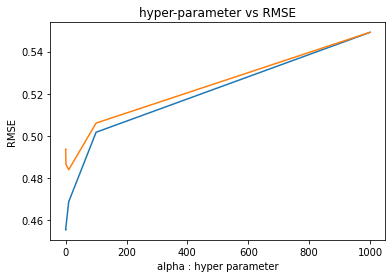

In [ ]:
# importing the required module
import matplotlib.pyplot as plt


# plotting the points
plt.plot(alpha_s,train_rmse)
plt.plot(alpha_s,validation_rmse)

# naming the x axis
plt.xlabel('alpha : hyper parameter')
# naming the y axis
plt.ylabel('RMSE')

# giving a title to my graph
plt.title('hyper-parameter vs RMSE')

# function to show the plot
plt.show()


In [ ]:
tmp_dict = {'alpha_s' : alpha_s,
            'Train_rmse' : train_rmse ,
            'val_rmse' :validation_rmse}
pd.DataFrame(tmp_dict)

,alpha_s,Train_rmse,val_rmse
0,0.00001,0.455402,0.493693
1,0.00010,0.455384,0.493760
2,0.00100,0.455410,0.493668
3,0.01000,0.455442,0.493463
4,0.10000,0.455437,0.492387
5,1.00000,0.456935,0.486354
6,10.00000,0.468753,0.483938
7,100.00000,0.501716,0.506057
8,1000.00000,0.549092,0.549141


In [ ]:
best_alpha = 10
final_linear_model = Ridge(alpha = best_alpha)
final_linear_model.fit(final_train_data_1,y_train.values)
y_pred = final_linear_model.predict(final_train_data_1)
rmse = np.sqrt(sum((y_pred - y_train.values)**2)/len(y_pred))
print(' Train_RMSE : ',rmse)
y_pred = final_linear_model.predict(final_cv_data_1)
rmse = np.sqrt(sum((y_pred - y_validation.values)**2)/len(y_pred))
print('CV RMSE : ',rmse)


 Train_RMSE :  0.4693994981491512
CV RMSE :  0.4848529134295842


In [ ]:
#saving the model
'''with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/final_linear_model.pkl', 'wb') as fp:
  pickle.dump(final_linear_model, fp) 
'''

### Training on total data with brand name feature imputed:

In [ ]:
final_cv_data_2 = data_pipline(X_validation,brand_name_imputed=True)

In [ ]:
final_cv_data_2.shape

(148167, 66173)

In [ ]:
from sklearn.linear_model import Ridge
train_rmse = []
validation_rmse = []
alpha_s = [0.00001, 0.0001, 0.001, 0.01,0.1,1,10,100,1000]
for hy_para in alpha_s:
  reg_linear_model = Ridge(alpha = hy_para)
  reg_linear_model.fit(final_train_data_2,y_train.values)
  y_pred = reg_linear_model.predict(final_train_data_2)

  rmse = np.sqrt(sum((y_pred - y_train.values)**2)/len(y_pred))

  train_rmse.append(rmse)

  y_pred = reg_linear_model.predict(final_cv_data_2)

  rmse = np.sqrt(sum((y_pred - y_validationt.values)**2)/len(y_pred))

  validation_rmse.append(rmse)



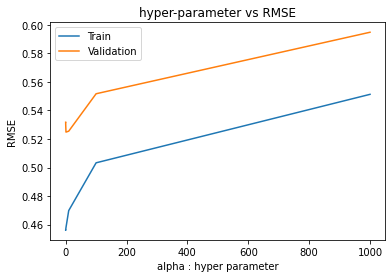

In [ ]:
# importing the required module
import matplotlib.pyplot as plt


# plotting the points
plt.plot(alpha_s,train_rmse,label='Train')
plt.plot(alpha_s,validation_rmse,label='Validation')

# naming the x axis
plt.xlabel('alpha : hyper parameter')
# naming the y axis
plt.ylabel('RMSE')
plt.legend()

# giving a title to my graph
plt.title('hyper-parameter vs RMSE')

# function to show the plot
plt.show()


In [ ]:
tmp_dict = {'alpha_s' : alpha_s,
            'Train_rmse' : train_rmse ,
            'val_rmse' :validation_rmse}
pd.DataFrame(tmp_dict)

,alpha_s,Train_rmse,val_rmse
0,0.00001,0.456297,0.531703
1,0.00010,0.456299,0.531682
2,0.00100,0.456341,0.531474
3,0.01000,0.456314,0.531479
4,0.10000,0.456378,0.530216
5,1.00000,0.457923,0.524828
6,10.00000,0.469835,0.525476
7,100.00000,0.503311,0.551684
8,1000.00000,0.551275,0.594775


### Training on data without oultiers ( in price and number of words):

In [ ]:
final_cv_data_3 = data_pipline(X_validation,brand_name_imputed=False,without_outliers_data=True)

In [ ]:
final_cv_data_3.shape

(148167, 65757)

In [ ]:
'''
with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/final_cv_data_3.pkl', 'wb') as fp:
    pickle.dump(final_cv_data_3, fp) 
with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/y_train_without_outliers.pkl', 'wb') as fp:
    pickle.dump(y_train_without_outliers, fp)
'''

In [ ]:
from sklearn.linear_model import Ridge
train_rmse = []
validation_rmse = []
alpha_s = [0.00001, 0.0001, 0.001, 0.01,0.1,1,10,100,1000]
for hy_para in alpha_s:
  reg_linear_model = Ridge(alpha = hy_para)
  reg_linear_model.fit(final_train_data_3,y_train_without_outliers)
  y_pred = reg_linear_model.predict(final_train_data_3)

  rmse = np.sqrt(sum((y_pred - y_train_without_outliers)**2)/len(y_pred))

  train_rmse.append(rmse)

  y_pred = reg_linear_model.predict(final_cv_data_3)

  rmse = np.sqrt(sum((y_pred - y_validationt.values)**2)/len(y_pred))

  validation_rmse.append(rmse)



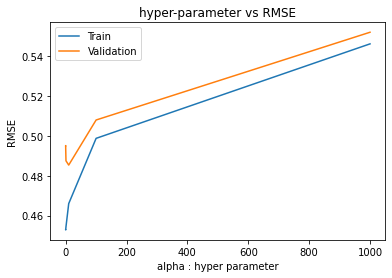

In [ ]:
# importing the required module
import matplotlib.pyplot as plt


# plotting the points
plt.plot(alpha_s,train_rmse,label='Train')
plt.plot(alpha_s,validation_rmse,label='Validation')

# naming the x axis
plt.xlabel('alpha : hyper parameter')
# naming the y axis
plt.ylabel('RMSE')
plt.legend()

# giving a title to my graph
plt.title('hyper-parameter vs RMSE')

# function to show the plot
plt.show()


In [ ]:
tmp_dict = {'alpha_s' : alpha_s,
            'Train_rmse' : train_rmse ,
            'val_rmse' :validation_rmse}
pd.DataFrame(tmp_dict)

,alpha_s,Train_rmse,val_rmse
0,0.00001,0.452784,0.495122
1,0.00010,0.452776,0.495154
2,0.00100,0.452776,0.495142
3,0.01000,0.452775,0.495014
4,0.10000,0.452835,0.493723
5,1.00000,0.454337,0.487512
6,10.00000,0.465992,0.485360
7,100.00000,0.498787,0.508005
8,1000.00000,0.546261,0.552101


### Traing on data after removing outliers and brand name feature imputed:

In [ ]:
final_cv_data_4 = data_pipline(X_validation,brand_name_imputed=True,without_outliers_data=True)

In [ ]:
final_cv_data_4.shape

(148167, 65757)

In [ ]:
'''
with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/final_cv_data_4.pkl', 'wb') as fp:
    pickle.dump(final_cv_data_4, fp) 
'''

In [ ]:
from sklearn.linear_model import Ridge
train_rmse = []
validation_rmse = []
alpha_s = [0.00001, 0.0001, 0.001, 0.01,0.1,1,10,100,1000]
for hy_para in alpha_s:
  reg_linear_model = Ridge(alpha = hy_para)
  reg_linear_model.fit(final_train_data_4,y_train_without_outliers)
  y_pred = reg_linear_model.predict(final_train_data_4)

  rmse = np.sqrt(sum((y_pred - y_train_without_outliers)**2)/len(y_pred))

  train_rmse.append(rmse)

  y_pred = reg_linear_model.predict(final_cv_data_4)

  rmse = np.sqrt(sum((y_pred - y_validationt.values)**2)/len(y_pred))

  validation_rmse.append(rmse)



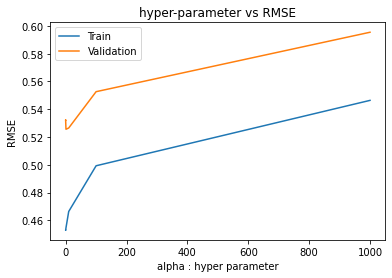

In [ ]:
# importing the required module
import matplotlib.pyplot as plt


# plotting the points
plt.plot(alpha_s,train_rmse,label='Train')
plt.plot(alpha_s,validation_rmse,label='Validation')

# naming the x axis
plt.xlabel('alpha : hyper parameter')
# naming the y axis
plt.ylabel('RMSE')
plt.legend()

# giving a title to my graph
plt.title('hyper-parameter vs RMSE')

# function to show the plot
plt.show()


In [ ]:
tmp_dict = {'alpha_s' : alpha_s,
            'Train_rmse' : train_rmse ,
            'val_rmse' :validation_rmse}
pd.DataFrame(tmp_dict)

,alpha_s,Train_rmse,val_rmse
0,0.00001,0.453159,0.532083
1,0.00010,0.453168,0.532032
2,0.00100,0.453140,0.532196
3,0.01000,0.453141,0.532076
4,0.10000,0.453212,0.530824
5,1.00000,0.454623,0.525604
6,10.00000,0.466403,0.526522
7,100.00000,0.499319,0.552655
8,1000.00000,0.546397,0.595440


### Summary:

In [ ]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Model", "Dataset","hyper-parameter", "Train RMSE", "CV RMSE"])

# Add rows
myTable.add_row(["Linear Regression-L2", "Total data","10.0", "0.4687", "0.4839"])
myTable.add_row(["Linear Regression-L2", "total data +brand_name imputed",'1.0','0.4579',	'0.5248'])
myTable.add_row(["Linear Regression-L2", "without outliers data","10.0", "0.4659", "0.4853"])
myTable.add_row(["Linear Regression-L2", "without outliers data + brand_name imputed",'1.0','0.4546','0.5256'])


print(myTable)


+----------------------+--------------------------------------------+-----------------+------------+---------+
|        Model         |                  Dataset                   | hyper-parameter | Train RMSE | CV RMSE |
+----------------------+--------------------------------------------+-----------------+------------+---------+
| Linear Regression-L2 |                 Total data                 |       10.0      |   0.4687   |  0.4839 |
| Linear Regression-L2 |       total data +brand_name imputed       |       1.0       |   0.4579   |  0.5248 |
| Linear Regression-L2 |           without outliers data            |       10.0      |   0.4659   |  0.4853 |
| Linear Regression-L2 | without outliers data + brand_name imputed |       1.0       |   0.4546   |  0.5256 |
+----------------------+--------------------------------------------+-----------------+------------+---------+


#### Observation:
* Linear regression -L2 is not performing well on imputed data when compared with no imputation data.
* There is no significant difference in scores with total data and without outliers data.
* The above scores also tell us that "brand name" feature is an important feature to predicate the price value, predicating brand name wrong is very costly.
* So, working on only Total data for further modeling .

## LGBM model:

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
param_distributions={'num_leaves'      : [50,80,110,150],
                     'max_depth'       : [8,12,16,20],
                    'learning_rate'    : [0.05,0.1,0.3],
                     'n_estimators'    : [100,150,200],
                    'colsample_bytree' : [1,0.8,0.6],
                     'reg_alpha' : [0,0.01,0.001],
                     'reg_lambda' : [0,0.01,0.001]}


model = LGBMRegressor(boosting_type='gbdt', objective='regression',  min_child_samples=50, reg_lambda=0.0,\
              random_state=30, n_jobs=- 1 )

random_search_cv = RandomizedSearchCV(model, param_distributions, scoring='neg_root_mean_squared_error',\
                    n_jobs=-1, refit=True, cv=3, verbose=1, random_state=30, return_train_score=True)

random_search_cv.fit(final_train_data_1,y_train.values)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=LGBMRegressor(min_child_samples=50,
                                           objective='regression',
                                           random_state=30),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [1, 0.8, 0.6],
                                        'learning_rate': [0.05, 0.1, 0.3],
                                        'max_depth': [8, 12, 16, 20],
                                        'n_estimators': [100, 150, 200],
                                        'num_leaves': [50, 80, 110, 150],
                                        'reg_alpha': [0, 0.01, 0.001],
                                        'reg_lambda': [0, 0.01, 0.001]},
                   random_state=30, return_train_score=True,
                   scoring='neg_root_mean_squared_error', verbose=1)

In [ ]:
'''
  with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/random_search_lgbm.pkl', 'wb') as fp:
    pickle.dump(random_search_cv, fp) 
'''

In [ ]:
random_search_cv.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.3,
 'max_depth': 20,
 'n_estimators': 200,
 'num_leaves': 150,
 'reg_alpha': 0.001,
 'reg_lambda': 0}

In [ ]:
tmp = pd.DataFrame(random_search_cv.cv_results_)
tmp

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_lambda,param_reg_alpha,param_num_leaves,param_n_estimators,param_max_depth,param_learning_rate,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,382.269156,6.038462,6.368858,0.230810,0.001,0,150,200,8,0.1,...,-0.536586,-0.537194,-0.536502,0.000603,6,-0.531250,-0.531196,-0.531432,-0.531292,0.000101
1,981.197103,3.724313,13.901081,1.571830,0.01,0.001,110,200,20,0.05,...,-0.524800,-0.524777,-0.524498,0.000411,5,-0.519244,-0.519164,-0.519045,-0.519151,0.000081
2,703.969930,6.110003,11.521920,0.217589,0.01,0,50,200,20,0.05,...,-0.537912,-0.538297,-0.537851,0.000391,8,-0.535323,-0.535253,-0.535267,-0.535281,0.000030
3,750.410344,4.057715,13.209126,0.102244,0,0.001,150,200,20,0.3,...,-0.480428,-0.480669,-0.480291,0.000376,1,-0.454700,-0.454439,-0.454457,-0.454532,0.000119
4,322.150085,4.525755,4.952972,0.082642,0.001,0.01,150,150,8,0.1,...,-0.546454,-0.546612,-0.546177,0.000508,10,-0.541692,-0.541896,-0.541464,-0.541684,0.000176
5,660.784664,1.145472,9.997682,0.134815,0,0.01,80,200,16,0.3,...,-0.485793,-0.485597,-0.485409,0.000412,2,-0.468017,-0.467635,-0.467723,-0.467792,0.000163
6,280.216433,0.518896,4.780698,0.075350,0.01,0,110,150,8,0.3,...,-0.510604,-0.511598,-0.511308,0.000500,3,-0.503715,-0.501015,-0.502127,-0.502285,0.001108
7,208.082496,2.279016,3.397583,0.019419,0.01,0.001,150,100,8,0.3,...,-0.523807,-0.522517,-0.522908,0.000637,4,-0.515775,-0.516171,-0.514805,-0.515583,0.000574
8,307.372089,2.723423,4.433932,0.085555,0,0,80,100,12,0.1,...,-0.544530,-0.543813,-0.543795,0.000607,9,-0.540035,-0.540530,-0.539500,-0.540022,0.000421
9,379.522496,44.305266,5.013766,0.936519,0.01,0.001,50,100,20,0.1,...,-0.537714,-0.537727,-0.537507,0.000301,7,-0.534984,-0.534906,-0.534465,-0.534785,0.000228


In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/random_search_lgbm.pkl', 'rb') as fp:
    random_search_cv = pickle.load(fp)

In [ ]:
y_train_pred = random_search_cv.predict(final_train_data_1)
rmse = np.sqrt(sum((y_train_pred - y_train.values)**2)/len(y_train_pred))
rmse

0.45717518878545615

In [ ]:
y_cv_pred = random_search_cv.predict(final_cv_data_1)
rmse = np.sqrt(sum((y_cv_pred - y_validation.values)**2)/len(y_cv_pred))
rmse

0.47719296497835695

In [ ]:
# trying to use above param and fine tuning it

lgbm_regressor3=LGBMRegressor(learning_rate=0.3,max_depth=20,n_estimators=200,num_leaves=200,objective='regression',\
                             boosting_type='gbdt',colsample_bytree=0.8,min_child_samples=25,param_reg_alpha=10,param_reg_lambda =10,\
                             random_state=30, n_jobs=- 1 )
lgbm_regressor3.fit(final_train_data_1,y_train.values)

LGBMRegressor(colsample_bytree=0.8, learning_rate=0.3, max_depth=20,
              min_child_samples=25, n_estimators=200, num_leaves=200,
              objective='regression', param_reg_alpha=10, param_reg_lambda=10,
              random_state=30)

In [ ]:
# saving the model 

'''
with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/lgbm_regressor3.pkl', 'wb') as fp:
    pickle.dump(lgbm_regressor3, fp) 
'''

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/lgbm_regressor3.pkl', 'rb') as fp:
    lgbm_regressor = pickle.load(fp)  


In [ ]:
y_train_pred = lgbm_regressor.predict(final_train_data_1)
rmse_tr = np.sqrt(sum((y_train_pred - y_train.values)**2)/len(y_train_pred))

y_cv_pred = lgbm_regressor.predict(final_cv_data_1)
rmse_cv = np.sqrt(sum((y_cv_pred - y_validation.values)**2)/len(y_cv_pred))

print('train RMSE : ',rmse_tr)
print('CV RMSE : ',rmse_cv)

train RMSE :  0.4436795447251455
CV RMSE :  0.4721704121682103


###Score summary:

In [ ]:
from prettytable import PrettyTable

table = PrettyTable(["Model", "Dataset", "Train RMSE", "CV RMSE"])
table.add_row(["LGBM", "Total data","0.4436", "0.4721"])
print(table)


+-------+------------+------------+---------+
| Model |  Dataset   | Train RMSE | CV RMSE |
+-------+------------+------------+---------+
|  LGBM | Total data |   0.4436   |  0.4721 |
+-------+------------+------------+---------+


## FM_FTRL Model:

In [ ]:
!pip install Wordbatch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 5.1 MB/s 
     |████████████████████████████████| 50 kB 7.8 MB/s 
     |████████████████████████████████| 128 kB 62.9 MB/s 
     |████████████████████████████████| 3.5 MB 59.2 MB/s 
  Created wheel for Wordbatch: filename=Wordbatch-1.4.9-cp37-cp37m-linux_x86_64.whl size=2768564 sha256=ac8ca7382b5190cf276fef70e2eee57025c85082d64da84e871606f7a29c5b92
  Stored in directory: /root/.cache/pip/wheels/7c/c6/17/9c8d8c8e37a08ea8a9a3d7e75aaa642ae0e1d2f4079ce11d93
  Created wheel for py-lz4framed: filename=py_lz4framed-0.14.0-cp37-cp37m-linux_x86_64.whl size=346637 sha256=4ccb51281f5b1d1ddc527c3bf96bea7ffc5dafdaa27867054f56ca04dfc113ff
  Stored in directory: /root/.cache/pip/wheels/5c/9c/8e/5d008dfcbb83cfb99763f100d10b6b2d953274f48744b7be81
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149867

In [ ]:
from wordbatch.models import FTRL, FM_FTRL

fm_ftrl_model = FM_FTRL(alpha=0.001, L1=0.001, D=final_train_data_1.shape[1], alpha_fm=0.01, D_fm=2000, L2_fm=0.0, iters=45, threads=0)
fm_ftrl_model.fit(final_train_data_1,y_train.values)

Total e: 530985.4707256819
Total e: 482955.1786247989
Total e: 471828.01893927465
Total e: 465209.5456027133
Total e: 460534.7333585366
Total e: 456932.8335815594
Total e: 454007.95796603843
Total e: 451547.07231063436
Total e: 449420.22151273536
Total e: 447546.5972309013
Total e: 445869.5609797643
Total e: 444348.5993648588
Total e: 442955.0384733522
Total e: 441668.392030732
Total e: 440471.5075950971
Total e: 439351.16829551803
Total e: 438297.13300020737
Total e: 437301.39260982285
Total e: 436356.5443841036
Total e: 435456.52653268323
Total e: 434596.3112655434
Total e: 433772.32996040944
Total e: 432980.63310059346
Total e: 432218.1556351889
Total e: 431482.22806656116
Total e: 430770.5887849419
Total e: 430081.5804523434
Total e: 429413.1923760871
Total e: 428764.1070188214
Total e: 428133.07954354025
Total e: 427518.5230822315
Total e: 426919.23958667053
Total e: 426334.5020757995
Total e: 425763.2225248232
Total e: 425204.66208460776
Total e: 424657.8235878745
Total e: 424122

In [ ]:
y_train_pred = fm_ftrl_model.predict(final_train_data_1)
rmse_tr = np.sqrt(sum((y_train_pred - y_train.values)**2)/len(y_train_pred))

y_cv_pred = fm_ftrl_model.predict(final_cv_data_1)
rmse_cv = np.sqrt(sum((y_cv_pred - y_validation.values)**2)/len(y_cv_pred))

print('train RMSE : ',rmse_tr)
print('CV RMSE : ',rmse_cv)

train RMSE :  0.42282345023353607
CV RMSE :  0.457447692639594


In [ ]:
#saving the model
'''
with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/fm_ftrl_model.pkl', 'wb') as fp:
    pickle.dump(fm_ftrl_model, fp) 
'''

###Score summary:

In [ ]:
from prettytable import PrettyTable

table = PrettyTable(["Model", "Dataset", "Train RMSE", "CV RMSE"])
table.add_row(["FM_FTRL", "Total data","0.4228", "0.4574"])
print(table)


+---------+------------+------------+---------+
|  Model  |  Dataset   | Train RMSE | CV RMSE |
+---------+------------+------------+---------+
| FM_FTRL | Total data |   0.4228   |  0.4574 |
+---------+------------+------------+---------+


## Stacking above models with linear regression as meta model:

In [ ]:
# getting the predication of above models

with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/final_linear_model.pkl', 'rb') as fp:
    final_linear_model = pickle.load(fp)  

y_linear_train_pred = final_linear_model.predict(final_train_data_1)
y_linear_cv_pred = final_linear_model.predict(final_cv_data_1)

with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/lgbm_regressor3.pkl', 'rb') as fp:
    lgbm_regressor = pickle.load(fp)  

y_lgbm_train_pred = lgbm_regressor.predict(final_train_data_1)
y_lgbm_cv_pred = lgbm_regressor.predict(final_cv_data_1)

with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/fm_ftrl_model.pkl', 'rb') as fp:
    fm_ftrl_model = pickle.load(fp)  

y_fm_ftrl_train_pred = fm_ftrl_model.predict(final_train_data_1)
y_fm_ftrl_cv_pred = fm_ftrl_model.predict(final_cv_data_1)


In [ ]:
train_predicated_data = np.vstack((y_linear_train_pred,y_lgbm_train_pred,y_fm_ftrl_train_pred)).T
cv_predicated_data =  np.vstack((y_linear_cv_pred,y_lgbm_cv_pred,y_fm_ftrl_cv_pred)).T

train_predicated_data.shape

(1333494, 3)

In [ ]:
from sklearn.linear_model import Ridge
train_rmse = []
validation_rmse = []
alpha_s = [0.00001, 0.0001, 0.001, 0.01,0.1,1,10,100,1000]
for hy_para in alpha_s:
  reg_linear_model = Ridge(alpha = hy_para)
  reg_linear_model.fit(train_predicated_data,y_train.values)
  y_pred = reg_linear_model.predict(train_predicated_data)

  rmse = np.sqrt(sum((y_pred - y_train.values)**2)/len(y_pred))

  train_rmse.append(rmse)

  y_pred = reg_linear_model.predict(cv_predicated_data)

  rmse = np.sqrt(sum((y_pred - y_validation.values)**2)/len(y_pred))

  validation_rmse.append(rmse)



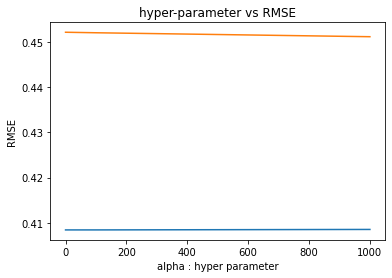

In [ ]:
# importing the required module
import matplotlib.pyplot as plt


# plotting the points
plt.plot(alpha_s,train_rmse)
plt.plot(alpha_s,validation_rmse)

# naming the x axis
plt.xlabel('alpha : hyper parameter')
# naming the y axis
plt.ylabel('RMSE')

# giving a title to my graph
plt.title('hyper-parameter vs RMSE')

# function to show the plot
plt.show()


In [ ]:
tmp_dict = {'alpha_s' : alpha_s,
            'Train_rmse' : train_rmse ,
            'val_rmse' :validation_rmse}
pd.DataFrame(tmp_dict)

,alpha_s,Train_rmse,val_rmse
0,0.00001,0.408418,0.452136
1,0.00010,0.408418,0.452136
2,0.00100,0.408418,0.452136
3,0.01000,0.408418,0.452136
4,0.10000,0.408418,0.452136
5,1.00000,0.408418,0.452135
6,10.00000,0.408418,0.452124
7,100.00000,0.408419,0.452021
8,1000.00000,0.408522,0.451148


In [ ]:
stacking = Ridge(alpha = 1000)
stacking.fit(train_predicated_data,y_train.values)
# saving model
'''
with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/stacking_model.pkl', 'wb') as fp:
    pickle.dump(stacking, fp) 
'''

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/stacking_model.pkl', 'rb') as fp:
    stacking = pickle.load(fp)


tr_pred = stacking.predict(train_predicated_data)
test_pred = stacking.predict(cv_predicated_data)


In [ ]:

rmse = np.sqrt(sum((test_pred - y_validation.values)**2)/len(test_pred))
rmse

0.4511477045979708

In [ ]:
train_predicated_data

array([[2.2548003 , 2.34697356, 2.25675449],
       [3.51312017, 3.59872077, 3.64312704],
       [3.16440236, 3.03286881, 3.13524992],
       ...,
       [2.49853652, 2.62955646, 2.45645277],
       [2.60437102, 2.72706885, 2.69715285],
       [3.06988967, 3.04044236, 3.19228886]])

In [ ]:
y_pred = stacking.predict(train_predicated_data)
rmse = np.sqrt(sum((y_pred - y_train.values)**2)/len(y_pred))
rmse

0.4085222213282852

In [ ]:
x = np.array([[2.2548003 , 2.34697356, 2.25675449]])
z= stacking.predict(x)
z[0]

2.280858181223407

In [ ]:
# getting the predication of above models

with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/final_linear_model.pkl', 'rb') as fp:
    final_linear_model = pickle.load(fp)  




with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/lgbm_regressor3.pkl', 'rb') as fp:
    lgbm_regressor = pickle.load(fp)  




with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/fm_ftrl_model.pkl', 'rb') as fp:
    fm_ftrl_model = pickle.load(fp)  

y_linear_test_2_pred = final_linear_model.predict(final_test)
y_lgbm_test_2_pred = lgbm_regressor.predict(final_test)
y_fm_ftrl_test_2_pred = fm_ftrl_model.predict(final_test)


In [ ]:
test_2_predicated_data = np.vstack((y_linear_test_2_pred,y_lgbm_test_2_pred,y_fm_ftrl_test_2_pred)).T

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/stacking_model.pkl', 'rb') as fp:
    stacking = pickle.load(fp)


test_2_pred = stacking.predict(test_2_predicated_data)

In [ ]:
my_submission = pd.DataFrame({'test_id': test_stg_2.test_id, 'price': np.exp(test_2_pred)})
# you could use any filename. We choose submission here
my_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/submission.csv', index=False)

# Summary of all Models:


In [ ]:
from prettytable import PrettyTable

table = PrettyTable(["Model", "Dataset", "Train RMSE", "CV RMSE"])
table.add_row(["Linear Regression-L2", "Total data", "0.4687", "0.4839"])
table.add_row(["LGBM", "Total data","0.4436", "0.4721"])
table.add_row(["FM_FTRL", "Total data","0.4228", "0.4574"])
table.add_row(["Stacking ", "Total data","0.4170", "0.4507"])

print(table)


+----------------------+------------+------------+---------+
|        Model         |  Dataset   | Train RMSE | CV RMSE |
+----------------------+------------+------------+---------+
| Linear Regression-L2 | Total data |   0.4687   |  0.4839 |
|         LGBM         | Total data |   0.4436   |  0.4721 |
|       FM_FTRL        | Total data |   0.4228   |  0.4574 |
|      Stacking        | Total data |   0.4170   |  0.4507 |
+----------------------+------------+------------+---------+


## Experiment with MLP:

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/y_train.pkl', 'rb') as fp:
    y_train = pickle.load(fp)  

with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/final_cv_data_1.pkl', 'rb') as fp:
    final_cv_data_1 = pickle.load(fp) 

with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/y_validationt.pkl', 'rb') as fp:
    y_validation = pickle.load(fp)  

with open('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/X_validation.pkl', 'rb') as fp:
    X_validation = pickle.load(fp)


final_train_data_1 = load_npz('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/train_data_1.npz')

            

In [5]:
from sklearn.preprocessing import Normalizer
import tensorflow as tf
from numpy import array
from numpy import asarray
from numpy import zeros
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras as ks
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPool1D, Flatten, Dropout, Dense, BatchNormalization, Concatenate
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras import initializers, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM

In [7]:
def mlp_model(input_shape):   #input_shape=X_train.shape[1]
    model_in = Input(shape=(input_shape,), dtype='float32', sparse=True)
    out = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001))(model_in)
    out = Dropout(0.10)(out)
    out = Dense(128, activation='relu',  kernel_regularizer=regularizers.l1(0.0001))(out)
    
    out = Dense(64, activation='relu')(out)
    out = Dense(1)(out)
    model = Model(model_in, out)
    return model

In [8]:
model = mlp_model(final_train_data_1.shape[1])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 66173)]           0         
                                                                 
 dense (Dense)               (None, 256)               16940544  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16,981,761
Trainable params: 16,981,761
Non-tra

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_path = "/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs"
checkpoint_best = ModelCheckpoint(filepath=model_path, monitor='val_loss',verbose=1, save_best_only=True, mode='min')

In [10]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
# https://stackoverflow.com/a/42963385/7697658
lrschedule = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.70, mode='min')

In [11]:
model.compile(loss='mse', optimizer=ks.optimizers.Adam(lr=0.0003), metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.fit(x=final_train_data_1, y=y_train.values, batch_size=192, epochs=20, verbose=True, validation_data=(final_cv_data_1, y_validation.values),
                 callbacks=[lrschedule,checkpoint_best])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 256), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


6945/6946 [============================>.] - ETA: 0s - loss: 0.4021 - root_mean_squared_error: 0.5485
Epoch 1: val_loss improved from inf to 0.29826, saving model to /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


6946/6946 [==============================] - 92s 12ms/step - loss: 0.4021 - root_mean_squared_error: 0.5485 - val_loss: 0.2983 - val_root_mean_squared_error: 0.4922 - lr: 3.0000e-04
Epoch 2/20
6944/6946 [============================>.] - ETA: 0s - loss: 0.2895 - root_mean_squared_error: 0.4906
Epoch 2: val_loss improved from 0.29826 to 0.27802, saving model to /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


6946/6946 [==============================] - 90s 12ms/step - loss: 0.2895 - root_mean_squared_error: 0.4906 - val_loss: 0.2780 - val_root_mean_squared_error: 0.4822 - lr: 3.0000e-04
Epoch 3/20
6946/6946 [==============================] - ETA: 0s - loss: 0.2788 - root_mean_squared_error: 0.4839
Epoch 3: val_loss improved from 0.27802 to 0.27330, saving model to /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


6946/6946 [==============================] - 89s 12ms/step - loss: 0.2788 - root_mean_squared_error: 0.4839 - val_loss: 0.2733 - val_root_mean_squared_error: 0.4789 - lr: 3.0000e-04
Epoch 4/20
6942/6946 [============================>.] - ETA: 0s - loss: 0.2754 - root_mean_squared_error: 0.4810
Epoch 4: val_loss improved from 0.27330 to 0.26947, saving model to /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


6946/6946 [==============================] - 89s 12ms/step - loss: 0.2754 - root_mean_squared_error: 0.4810 - val_loss: 0.2695 - val_root_mean_squared_error: 0.4755 - lr: 3.0000e-04
Epoch 5/20
6942/6946 [============================>.] - ETA: 0s - loss: 0.2740 - root_mean_squared_error: 0.4796
Epoch 5: val_loss improved from 0.26947 to 0.26925, saving model to /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


6946/6946 [==============================] - 89s 12ms/step - loss: 0.2740 - root_mean_squared_error: 0.4796 - val_loss: 0.2692 - val_root_mean_squared_error: 0.4750 - lr: 3.0000e-04
Epoch 6/20
6945/6946 [============================>.] - ETA: 0s - loss: 0.2732 - root_mean_squared_error: 0.4788
Epoch 6: val_loss did not improve from 0.26925
6946/6946 [==============================] - 87s 12ms/step - loss: 0.2732 - root_mean_squared_error: 0.4788 - val_loss: 0.2701 - val_root_mean_squared_error: 0.4761 - lr: 3.0000e-04
Epoch 7/20
6946/6946 [==============================] - ETA: 0s - loss: 0.2728 - root_mean_squared_error: 0.4784
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00021000000997446476.

Epoch 7: val_loss did not improve from 0.26925
6946/6946 [==============================] - 88s 12ms/step - loss: 0.2728 - root_mean_squared_error: 0.4784 - val_loss: 0.2699 - val_root_mean_squared_error: 0.4760 - lr: 3.0000e-04
Epoch 8/20
6943/6946 [============================>.] - 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


6946/6946 [==============================] - 88s 12ms/step - loss: 0.2592 - root_mean_squared_error: 0.4711 - val_loss: 0.2557 - val_root_mean_squared_error: 0.4685 - lr: 2.1000e-04
Epoch 9/20
6945/6946 [============================>.] - ETA: 0s - loss: 0.2569 - root_mean_squared_error: 0.4691
Epoch 9: val_loss did not improve from 0.25574
6946/6946 [==============================] - 87s 12ms/step - loss: 0.2569 - root_mean_squared_error: 0.4691 - val_loss: 0.2574 - val_root_mean_squared_error: 0.4699 - lr: 2.1000e-04
Epoch 10/20
6942/6946 [============================>.] - ETA: 0s - loss: 0.2566 - root_mean_squared_error: 0.4684
Epoch 10: ReduceLROnPlateau reducing learning rate to 0.00014700000901939346.

Epoch 10: val_loss did not improve from 0.25574
6946/6946 [==============================] - 87s 12ms/step - loss: 0.2566 - root_mean_squared_error: 0.4684 - val_loss: 0.2565 - val_root_mean_squared_error: 0.4685 - lr: 2.1000e-04
Epoch 11/20
6944/6946 [============================>.

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


6946/6946 [==============================] - 89s 12ms/step - loss: 0.2453 - root_mean_squared_error: 0.4614 - val_loss: 0.2451 - val_root_mean_squared_error: 0.4625 - lr: 1.4700e-04
Epoch 12/20
6946/6946 [==============================] - ETA: 0s - loss: 0.2429 - root_mean_squared_error: 0.4594
Epoch 12: val_loss improved from 0.24513 to 0.24480, saving model to /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


6946/6946 [==============================] - 89s 12ms/step - loss: 0.2429 - root_mean_squared_error: 0.4594 - val_loss: 0.2448 - val_root_mean_squared_error: 0.4619 - lr: 1.4700e-04
Epoch 13/20
6945/6946 [============================>.] - ETA: 0s - loss: 0.2425 - root_mean_squared_error: 0.4588
Epoch 13: val_loss improved from 0.24480 to 0.24410, saving model to /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


6946/6946 [==============================] - 89s 12ms/step - loss: 0.2425 - root_mean_squared_error: 0.4588 - val_loss: 0.2441 - val_root_mean_squared_error: 0.4610 - lr: 1.4700e-04
Epoch 14/20
6945/6946 [============================>.] - ETA: 0s - loss: 0.2422 - root_mean_squared_error: 0.4582
Epoch 14: val_loss did not improve from 0.24410
6946/6946 [==============================] - 87s 12ms/step - loss: 0.2422 - root_mean_squared_error: 0.4582 - val_loss: 0.2444 - val_root_mean_squared_error: 0.4611 - lr: 1.4700e-04
Epoch 15/20
6946/6946 [==============================] - ETA: 0s - loss: 0.2419 - root_mean_squared_error: 0.4577
Epoch 15: ReduceLROnPlateau reducing learning rate to 0.00010290000936947763.

Epoch 15: val_loss did not improve from 0.24410
6946/6946 [==============================] - 87s 12ms/step - loss: 0.2419 - root_mean_squared_error: 0.4577 - val_loss: 0.2457 - val_root_mean_squared_error: 0.4623 - lr: 1.4700e-04
Epoch 16/20
6945/6946 [============================

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


6946/6946 [==============================] - 88s 12ms/step - loss: 0.2318 - root_mean_squared_error: 0.4505 - val_loss: 0.2362 - val_root_mean_squared_error: 0.4567 - lr: 1.0290e-04
Epoch 17/20
6945/6946 [============================>.] - ETA: 0s - loss: 0.2293 - root_mean_squared_error: 0.4486
Epoch 17: val_loss improved from 0.23621 to 0.23502, saving model to /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


6946/6946 [==============================] - 89s 12ms/step - loss: 0.2293 - root_mean_squared_error: 0.4486 - val_loss: 0.2350 - val_root_mean_squared_error: 0.4554 - lr: 1.0290e-04
Epoch 18/20
6943/6946 [============================>.] - ETA: 0s - loss: 0.2284 - root_mean_squared_error: 0.4474
Epoch 18: val_loss did not improve from 0.23502
6946/6946 [==============================] - 89s 12ms/step - loss: 0.2284 - root_mean_squared_error: 0.4474 - val_loss: 0.2356 - val_root_mean_squared_error: 0.4558 - lr: 1.0290e-04
Epoch 19/20
6943/6946 [============================>.] - ETA: 0s - loss: 0.2279 - root_mean_squared_error: 0.4466
Epoch 19: ReduceLROnPlateau reducing learning rate to 7.203000859590247e-05.

Epoch 19: val_loss did not improve from 0.23502
6946/6946 [==============================] - 88s 12ms/step - loss: 0.2279 - root_mean_squared_error: 0.4466 - val_loss: 0.2359 - val_root_mean_squared_error: 0.4560 - lr: 1.0290e-04
Epoch 20/20
6946/6946 [=============================

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


6946/6946 [==============================] - 91s 13ms/step - loss: 0.2187 - root_mean_squared_error: 0.4388 - val_loss: 0.2300 - val_root_mean_squared_error: 0.4529 - lr: 7.2030e-05


In [12]:
model.fit(x=final_train_data_1, y=y_train.values, batch_size=192, epochs=10, verbose=True, validation_data=(final_cv_data_1, y_validation.values),
                 callbacks=[lrschedule_1,checkpoint_best])

Epoch 1/10
6943/6946 [============================>.] - ETA: 0s - loss: 0.2160 - root_mean_squared_error: 0.4367
Epoch 1: val_loss improved from 0.22998 to 0.22957, saving model to /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


6946/6946 [==============================] - 90s 13ms/step - loss: 0.2160 - root_mean_squared_error: 0.4367 - val_loss: 0.2296 - val_root_mean_squared_error: 0.4525 - lr: 7.2030e-05
Epoch 2/10
6946/6946 [==============================] - ETA: 0s - loss: 0.2149 - root_mean_squared_error: 0.4353
Epoch 2: val_loss did not improve from 0.22957
6946/6946 [==============================] - 88s 12ms/step - loss: 0.2149 - root_mean_squared_error: 0.4353 - val_loss: 0.2303 - val_root_mean_squared_error: 0.4531 - lr: 7.2030e-05
Epoch 3/10
6944/6946 [============================>.] - ETA: 0s - loss: 0.2143 - root_mean_squared_error: 0.4345
Epoch 3: ReduceLROnPlateau reducing learning rate to 5.042100601713173e-05.

Epoch 3: val_loss did not improve from 0.22957
6946/6946 [==============================] - 87s 12ms/step - loss: 0.2143 - root_mean_squared_error: 0.4345 - val_loss: 0.2296 - val_root_mean_squared_error: 0.4521 - lr: 7.2030e-05
Epoch 4/10
6944/6946 [============================>.] - E

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


6946/6946 [==============================] - 89s 12ms/step - loss: 0.2056 - root_mean_squared_error: 0.4260 - val_loss: 0.2252 - val_root_mean_squared_error: 0.4495 - lr: 5.0421e-05
Epoch 5/10
6942/6946 [============================>.] - ETA: 0s - loss: 0.2029 - root_mean_squared_error: 0.4236
Epoch 5: val_loss did not improve from 0.22524
6946/6946 [==============================] - 87s 12ms/step - loss: 0.2029 - root_mean_squared_error: 0.4236 - val_loss: 0.2268 - val_root_mean_squared_error: 0.4515 - lr: 5.0421e-05
Epoch 6/10
6942/6946 [============================>.] - ETA: 0s - loss: 0.2016 - root_mean_squared_error: 0.4222
Epoch 6: ReduceLROnPlateau reducing learning rate to 3.5294705230626275e-05.

Epoch 6: val_loss did not improve from 0.22524
6946/6946 [==============================] - 87s 12ms/step - loss: 0.2016 - root_mean_squared_error: 0.4222 - val_loss: 0.2261 - val_root_mean_squared_error: 0.4507 - lr: 5.0421e-05
Epoch 7/10
6942/6946 [============================>.] - 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


6946/6946 [==============================] - 89s 12ms/step - loss: 0.1938 - root_mean_squared_error: 0.4139 - val_loss: 0.2231 - val_root_mean_squared_error: 0.4486 - lr: 3.5295e-05
Epoch 8/10
6944/6946 [============================>.] - ETA: 0s - loss: 0.1911 - root_mean_squared_error: 0.4112
Epoch 8: val_loss improved from 0.22306 to 0.22272, saving model to /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


6946/6946 [==============================] - 89s 12ms/step - loss: 0.1911 - root_mean_squared_error: 0.4112 - val_loss: 0.2227 - val_root_mean_squared_error: 0.4484 - lr: 3.5295e-05
Epoch 9/10
6946/6946 [==============================] - ETA: 0s - loss: 0.1895 - root_mean_squared_error: 0.4094
Epoch 9: val_loss did not improve from 0.22272
6946/6946 [==============================] - 87s 12ms/step - loss: 0.1895 - root_mean_squared_error: 0.4094 - val_loss: 0.2237 - val_root_mean_squared_error: 0.4496 - lr: 3.5295e-05
Epoch 10/10
6945/6946 [============================>.] - ETA: 0s - loss: 0.1881 - root_mean_squared_error: 0.4077
Epoch 10: ReduceLROnPlateau reducing learning rate to 2.4706294425413944e-05.

Epoch 10: val_loss did not improve from 0.22272
6946/6946 [==============================] - 87s 12ms/step - loss: 0.1881 - root_mean_squared_error: 0.4077 - val_loss: 0.2245 - val_root_mean_squared_error: 0.4504 - lr: 3.5295e-05


In [13]:
model.fit(x=final_train_data_1, y=y_train.values, batch_size=192, epochs=10, verbose=True, validation_data=(final_cv_data_1, y_validation.values),
                 callbacks=[lrschedule_1,checkpoint_best])

Epoch 1/10
6946/6946 [==============================] - ETA: 0s - loss: 0.1811 - root_mean_squared_error: 0.3996
Epoch 1: val_loss improved from 0.22272 to 0.22262, saving model to /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


6946/6946 [==============================] - 89s 12ms/step - loss: 0.1811 - root_mean_squared_error: 0.3996 - val_loss: 0.2226 - val_root_mean_squared_error: 0.4491 - lr: 2.4706e-05
Epoch 2/10
6942/6946 [============================>.] - ETA: 0s - loss: 0.1788 - root_mean_squared_error: 0.3973
Epoch 2: val_loss did not improve from 0.22262
6946/6946 [==============================] - 88s 12ms/step - loss: 0.1788 - root_mean_squared_error: 0.3973 - val_loss: 0.2229 - val_root_mean_squared_error: 0.4496 - lr: 2.4706e-05
Epoch 3/10
6943/6946 [============================>.] - ETA: 0s - loss: 0.1773 - root_mean_squared_error: 0.3955
Epoch 3: ReduceLROnPlateau reducing learning rate to 1.729440609778976e-05.

Epoch 3: val_loss did not improve from 0.22262
6946/6946 [==============================] - 87s 12ms/step - loss: 0.1773 - root_mean_squared_error: 0.3955 - val_loss: 0.2238 - val_root_mean_squared_error: 0.4507 - lr: 2.4706e-05
Epoch 4/10
6944/6946 [============================>.] - E

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/train_data_files/BEST_MODEL.hdfs/assets


6946/6946 [==============================] - 88s 12ms/step - loss: 0.1693 - root_mean_squared_error: 0.3860 - val_loss: 0.2225 - val_root_mean_squared_error: 0.4498 - lr: 1.7294e-05
Epoch 6/10
6946/6946 [==============================] - ETA: 0s - loss: 0.1677 - root_mean_squared_error: 0.3841
Epoch 6: val_loss did not improve from 0.22249
6946/6946 [==============================] - 87s 12ms/step - loss: 0.1677 - root_mean_squared_error: 0.3841 - val_loss: 0.2230 - val_root_mean_squared_error: 0.4505 - lr: 1.7294e-05
Epoch 7/10
6942/6946 [============================>.] - ETA: 0s - loss: 0.1663 - root_mean_squared_error: 0.3824
Epoch 7: ReduceLROnPlateau reducing learning rate to 1.2106083886465058e-05.

Epoch 7: val_loss did not improve from 0.22249
6946/6946 [==============================] - 86s 12ms/step - loss: 0.1663 - root_mean_squared_error: 0.3824 - val_loss: 0.2238 - val_root_mean_squared_error: 0.4514 - lr: 1.7294e-05
Epoch 8/10
6943/6946 [============================>.] - 

In [17]:
with open('/content/final_test_stg2_pp.pkl', 'rb') as fp:
    test_pp_stg2 = pickle.load(fp)

In [19]:
pred_test_stg2 = model.predict(test_pp_stg2, batch_size=64)


In [29]:
my_submission = pd.DataFrame({'test_id': test_stg_2['test_id'].values, 'price': np.exp(pred_test_stg2[:,0])+1})
# you could use any filename. We choose submission here
my_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/Self_Case_Study_1/submission2.csv', index=False)